In [1]:
import numpy as np
from homography import pyrs12, spaces
import cv2, h5py, deproject, HandShapeAnalysis
import matplotlib.pyplot as plt

In [2]:
def plt_imsize(image,size=(10,10)):
    fig1 = plt.figure(figsize=size) # create a figure with the default size 
    ax1 = fig1.add_subplot(1,1,1) 
    ax1.imshow(image, interpolation='none')
    plt.show()

In [3]:
ls ../recording_data

1_tap.hdf5             2_zoomout_yes.hdf5     backup/
2_tap.hdf5             4_move_left_yes.hdf5   labeled/
2_zoomin_yes.hdf5      4_move_right_yes.hdf5


In [4]:
one = h5py.File('../recording_data/1_tap.hdf5', 'r')
org = one['pcl_center'][...]
mat = one['trans_matrix'][...]

In [5]:
analyser = HandShapeAnalysis.Depth2Finger(org, mat)
analyser.set_show(debug = False, finger_point_image = True, hull_image = True, detected_defect = True, cluster_point= True,  possibility_modal = False)

In [6]:
analyser.renew_depth(one['depth'][13])

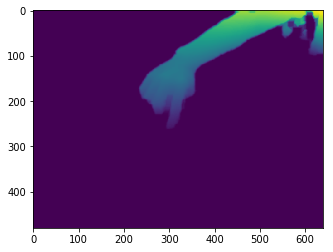

In [7]:
plt.imshow(analyser.process_image)

In [8]:
one.close()

   0 :  [[282, 315]] len:  1


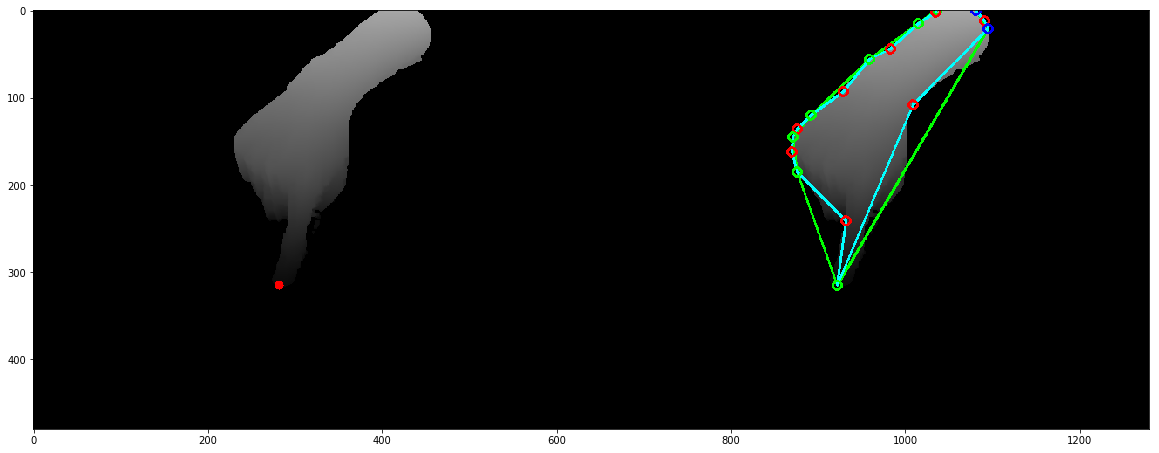

   1 :  [[287, 315]] len:  1


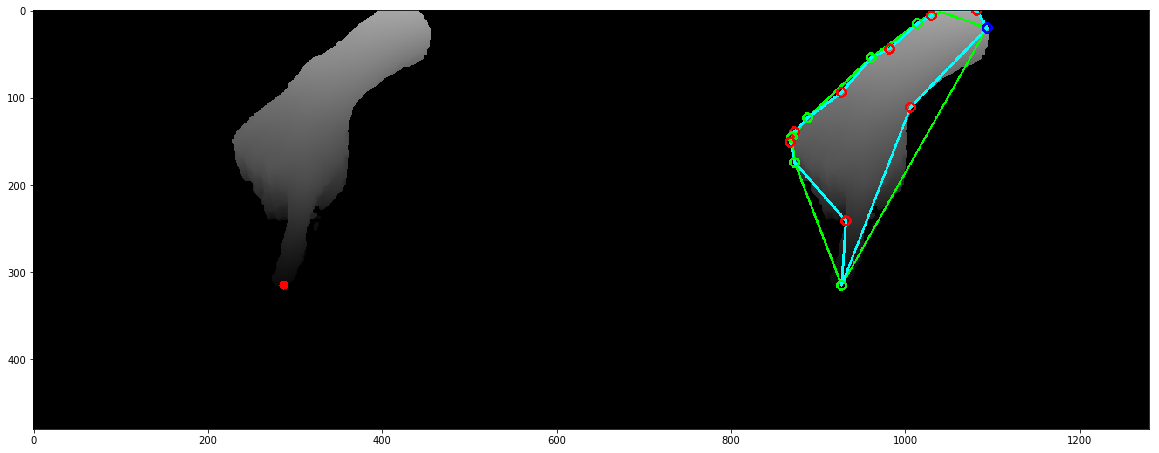

   2 :  [[283, 315]] len:  1


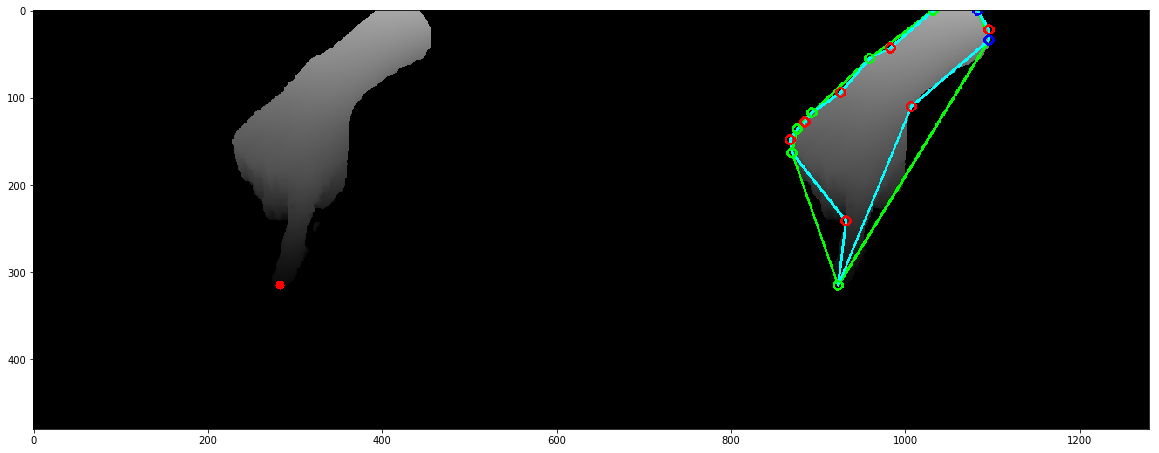

   3 :  [[282, 315]] len:  1


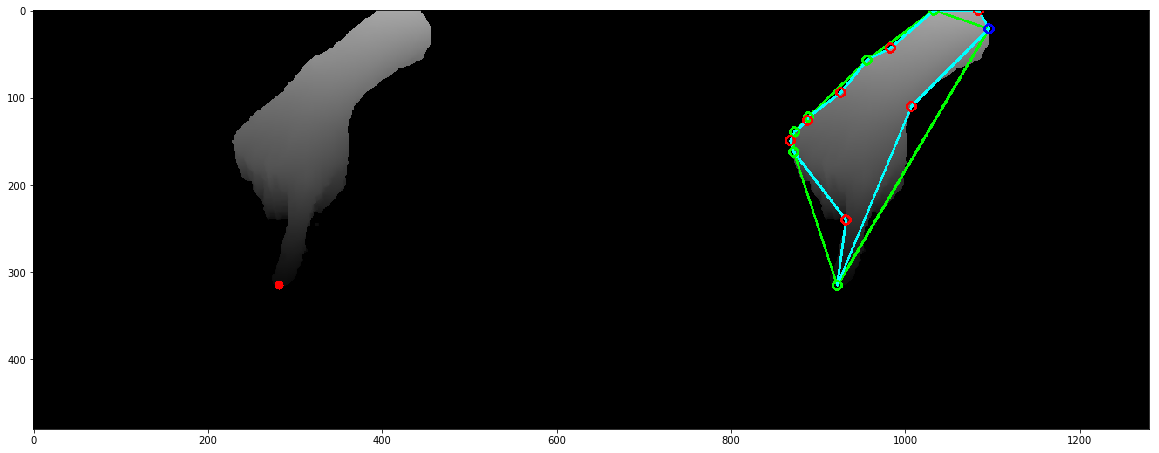

   4 :  [[289, 315]] len:  1


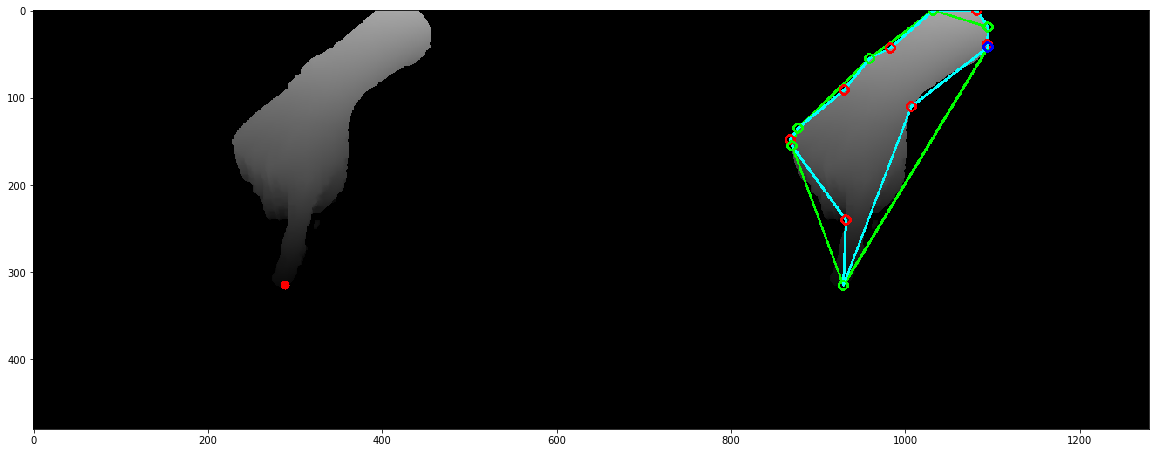

   5 :  [] len:  0


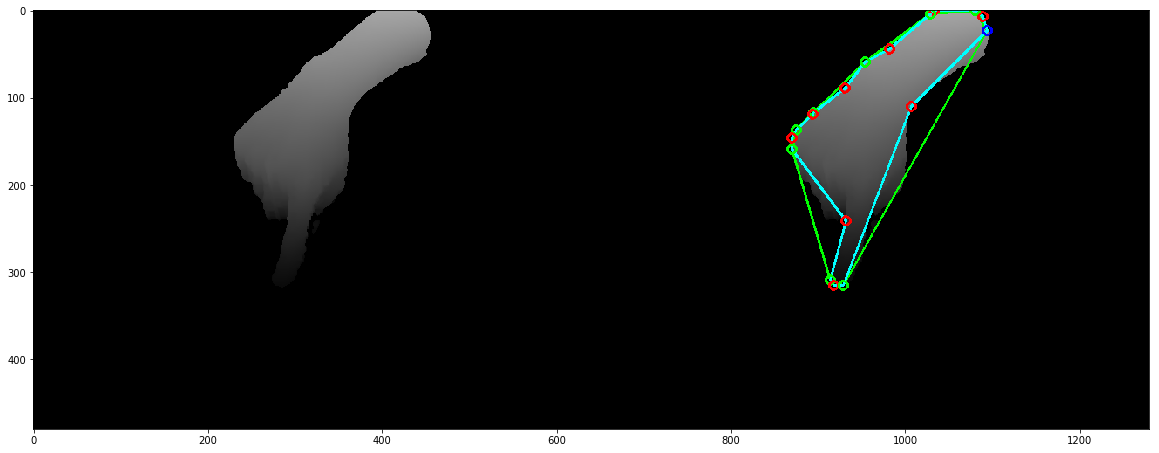

   6 :  [[282, 315]] len:  1


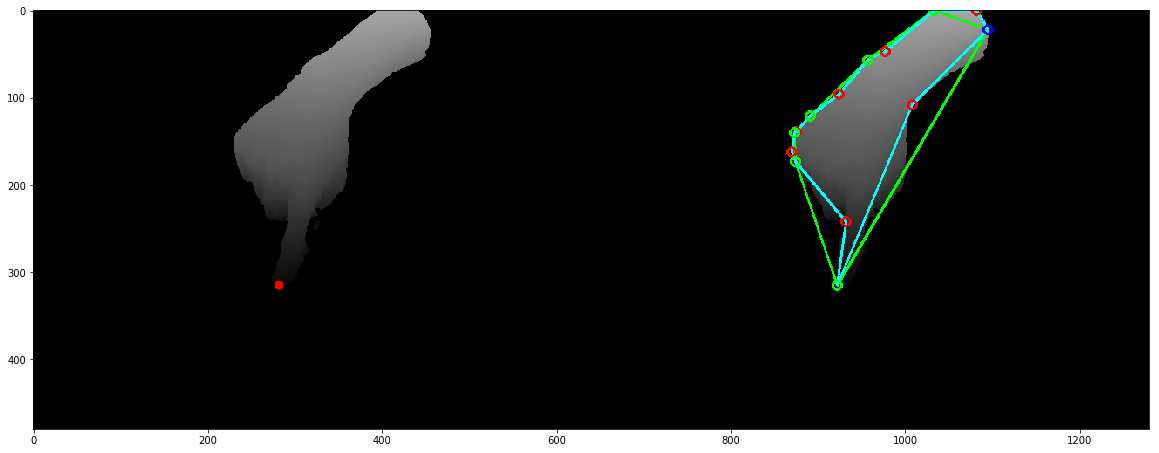

   7 :  [[290, 314]] len:  1


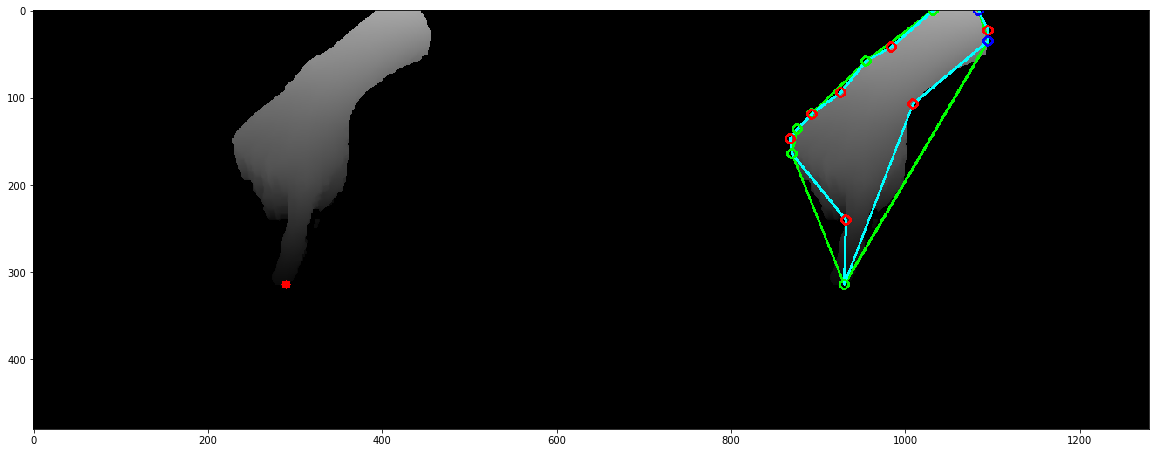

   8 :  [[285, 315]] len:  1


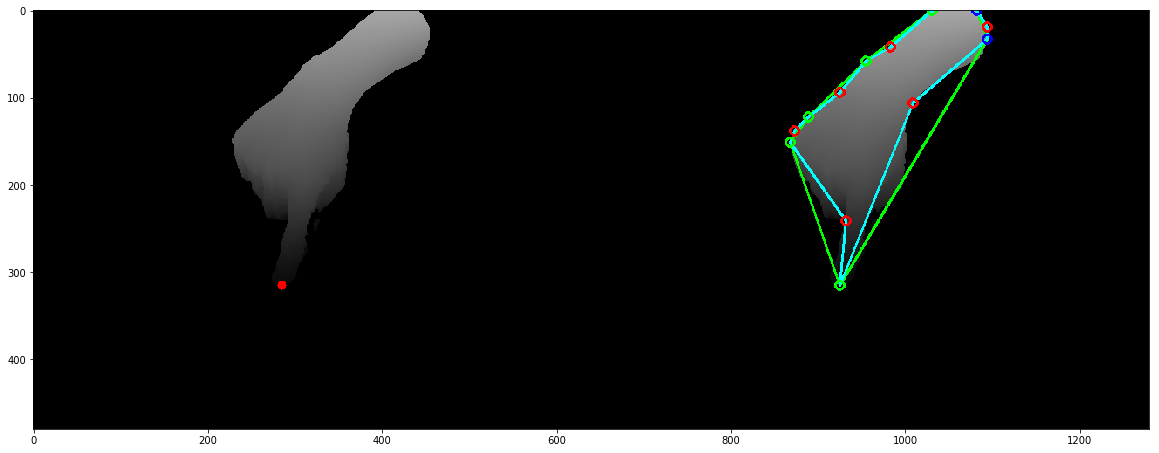

   9 :  [[289, 314]] len:  1


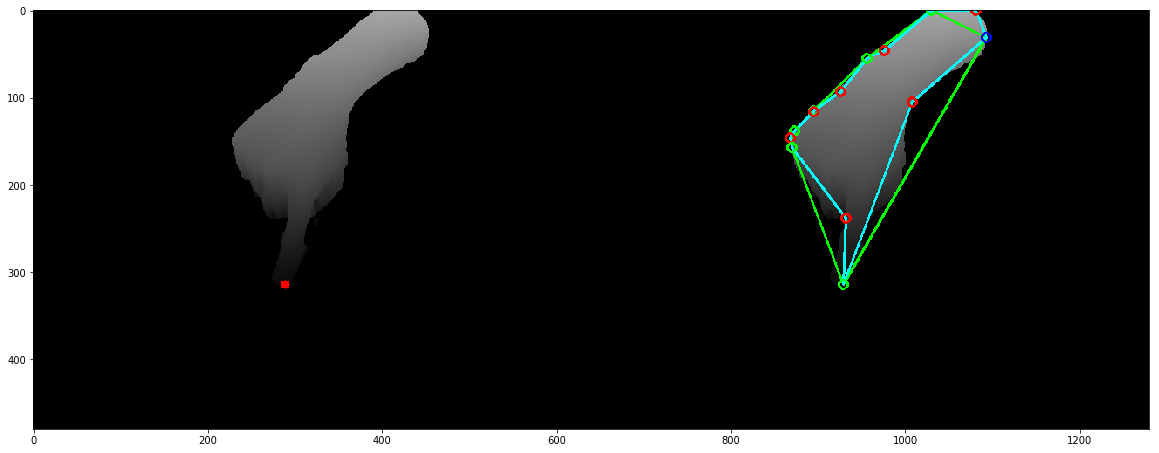

  10 :  [[287, 312]] len:  1


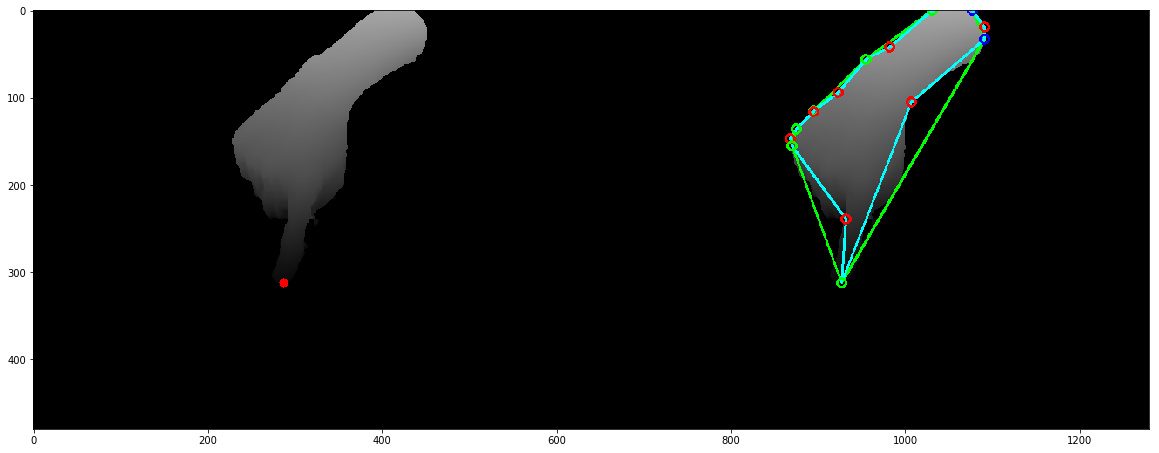

  11 :  [[290, 307]] len:  1


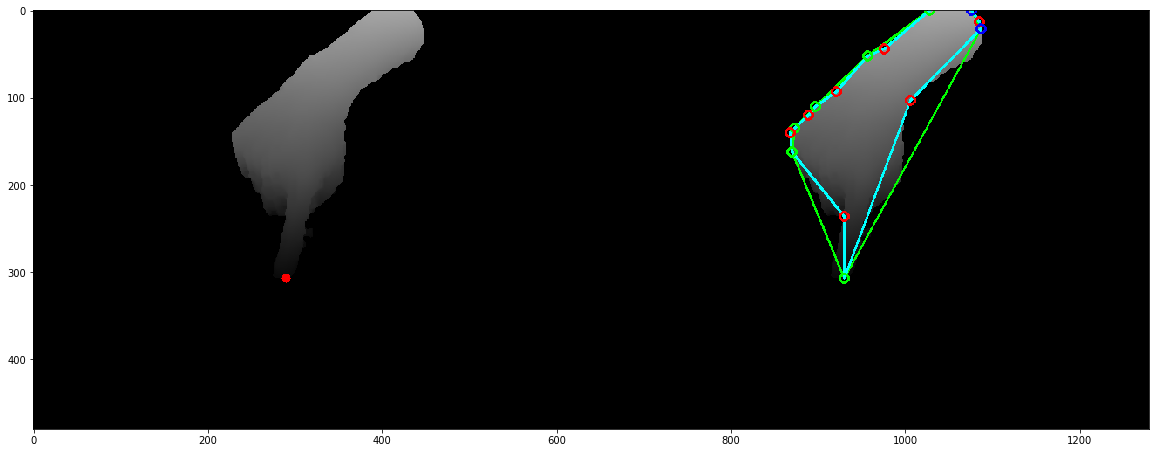

  12 :  [] len:  0


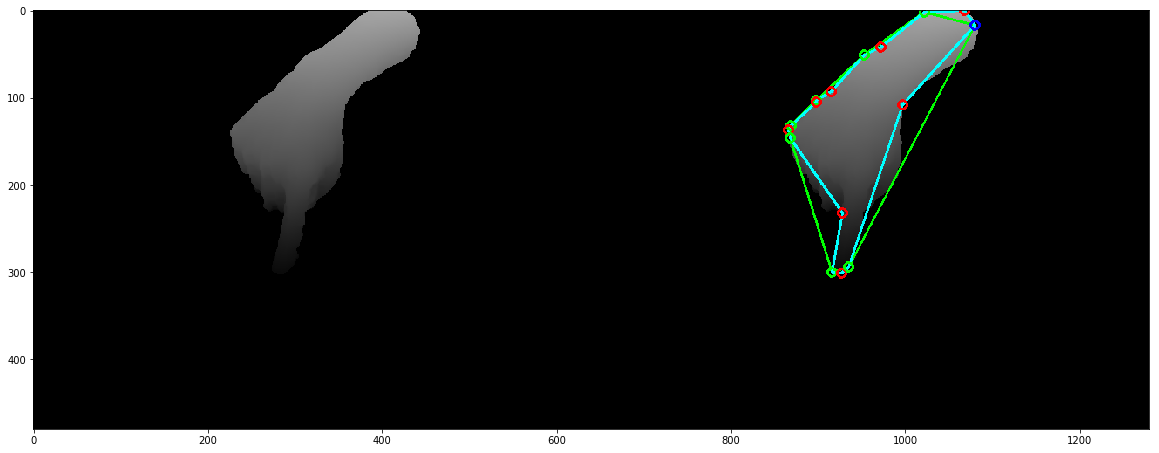

  13 :  [[283, 292]] len:  1


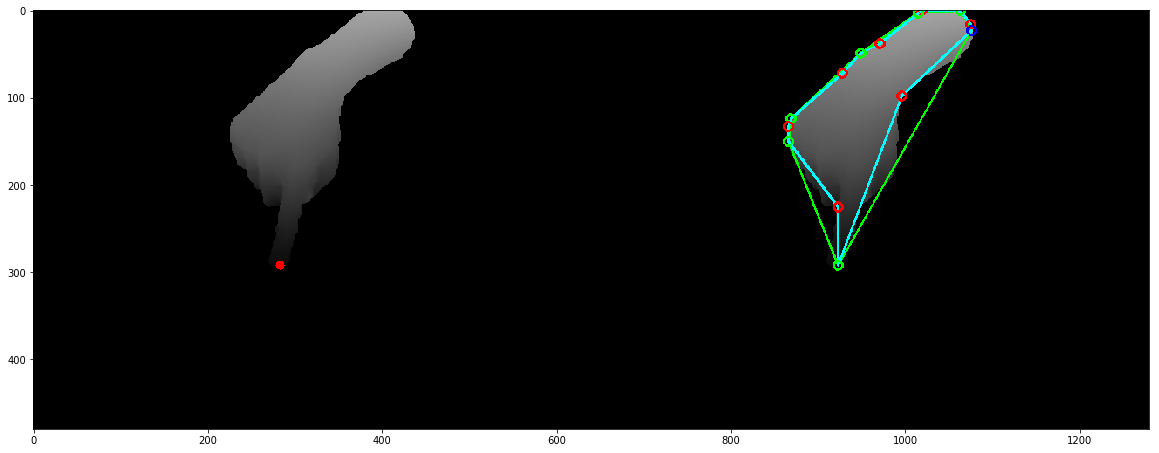

  14 :  [[282, 281]] len:  1


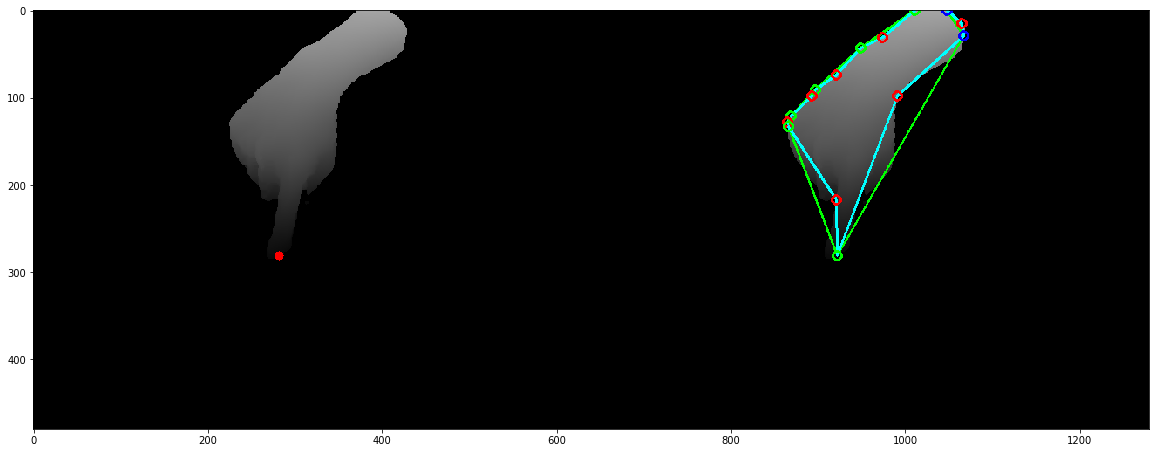

  15 :  [[282, 278]] len:  1


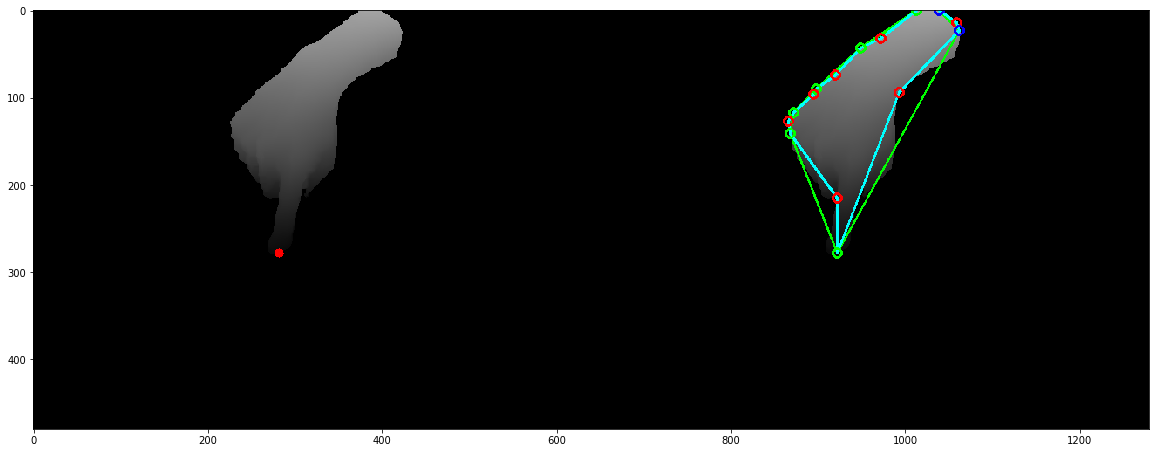

  16 :  [[281, 273]] len:  1


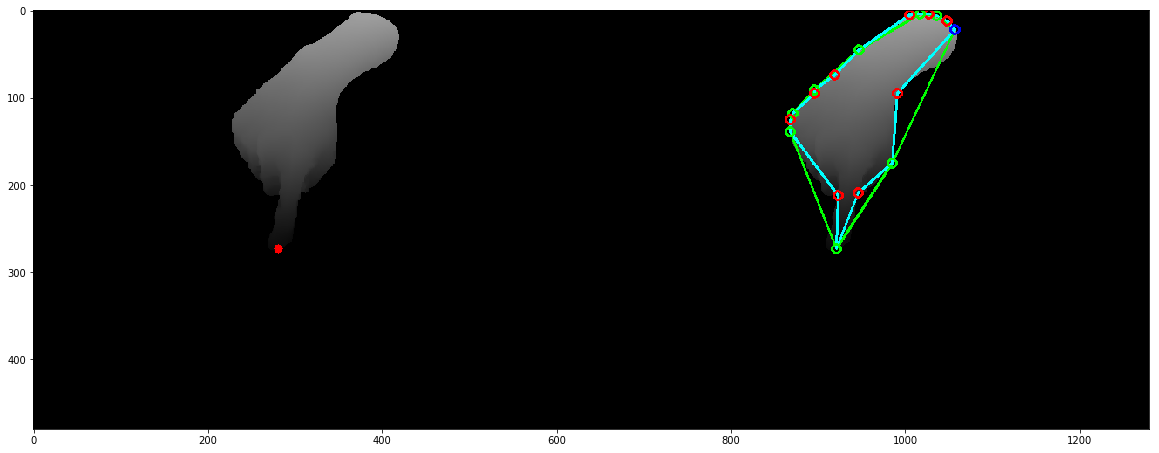

  17 :  [[283, 267]] len:  1


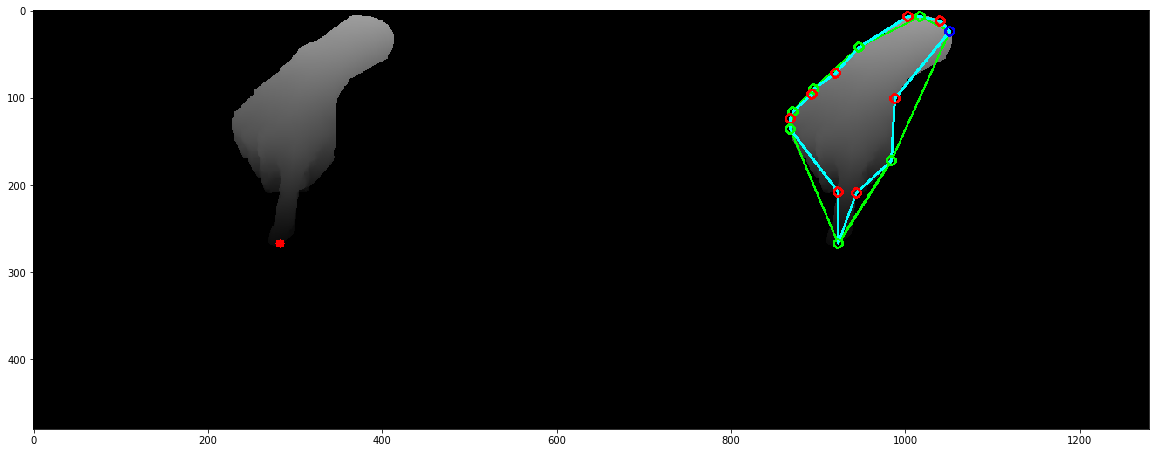

  18 :  [] len:  0


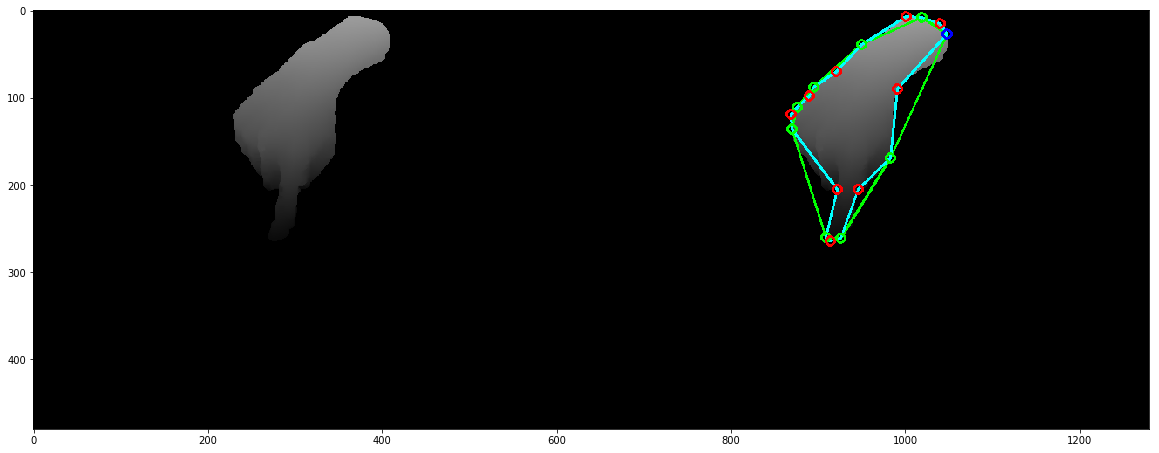

  19 :  [[284, 257]] len:  1


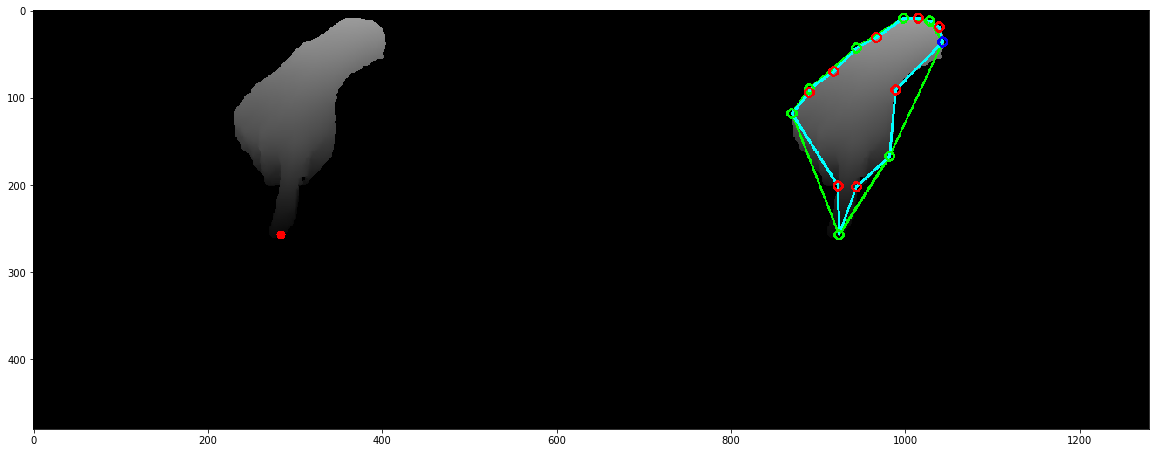

  20 :  [[282, 255]] len:  1


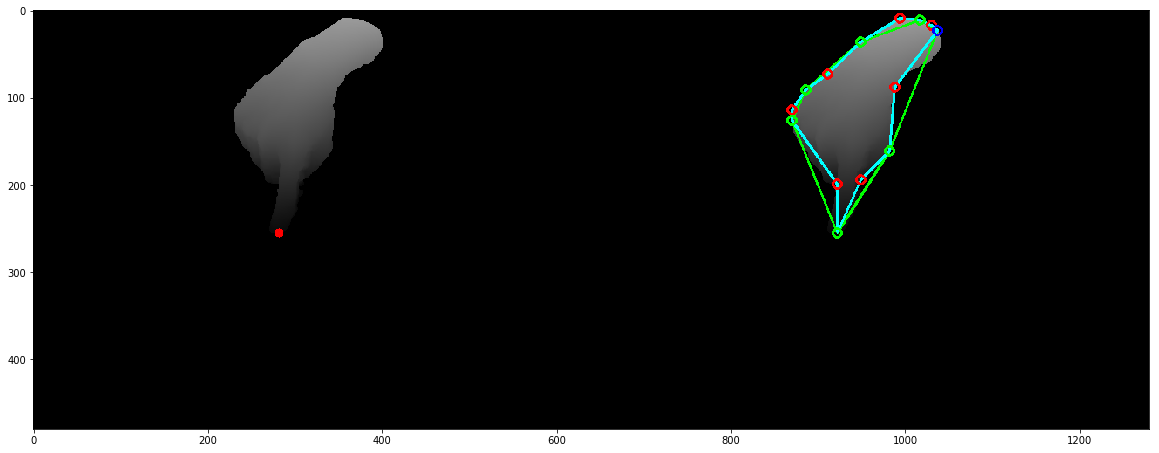

  21 :  [[283, 249]] len:  1


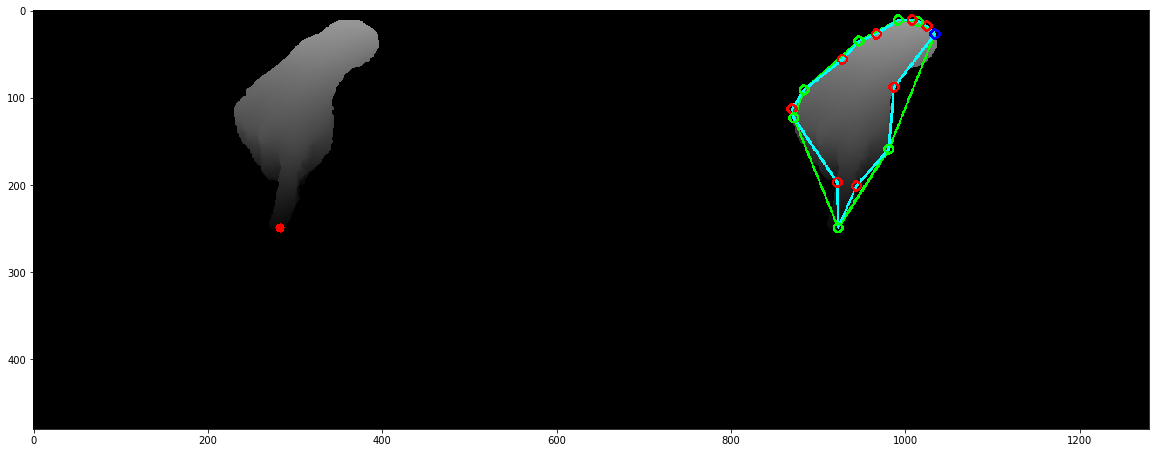

  22 :  [[285, 246]] len:  1


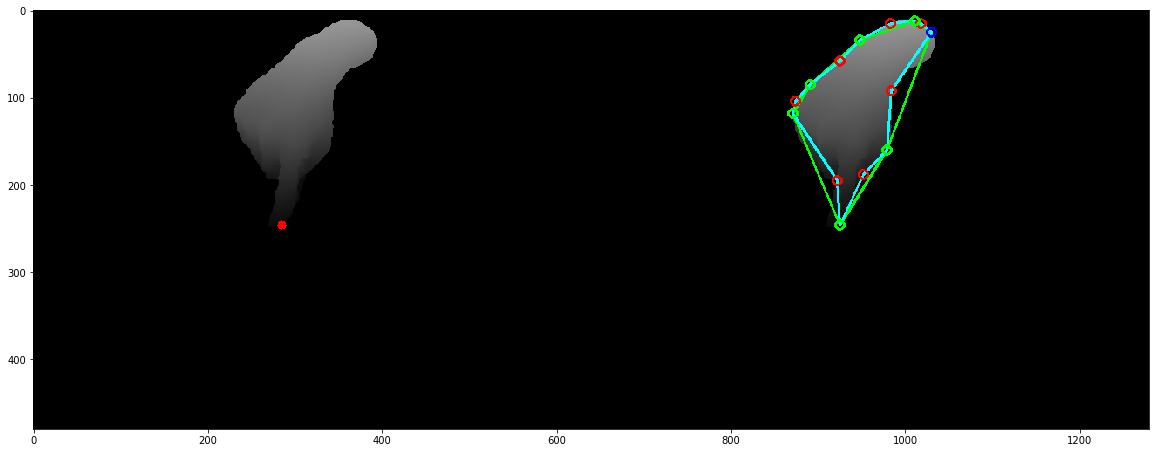

  23 :  [[282, 243]] len:  1


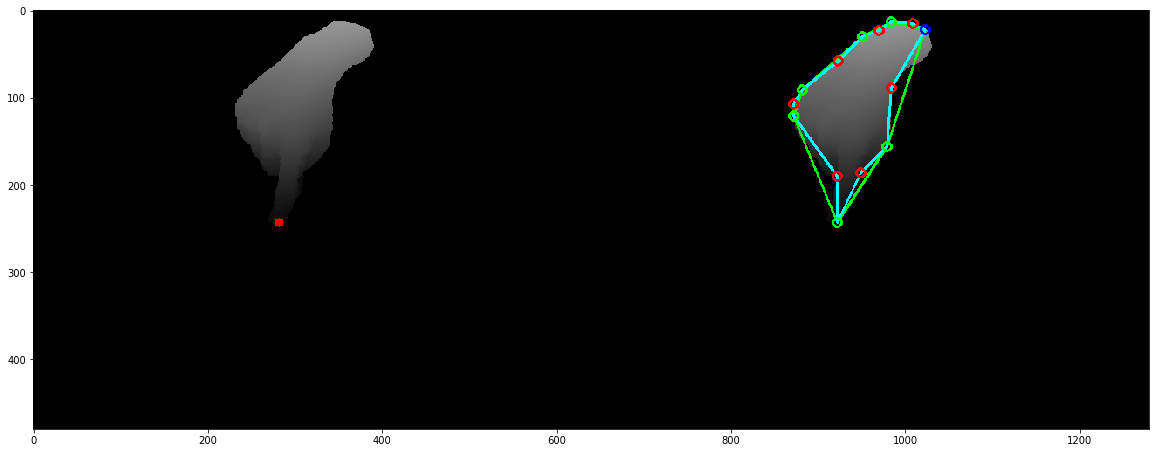

  24 :  [[282, 238]] len:  1


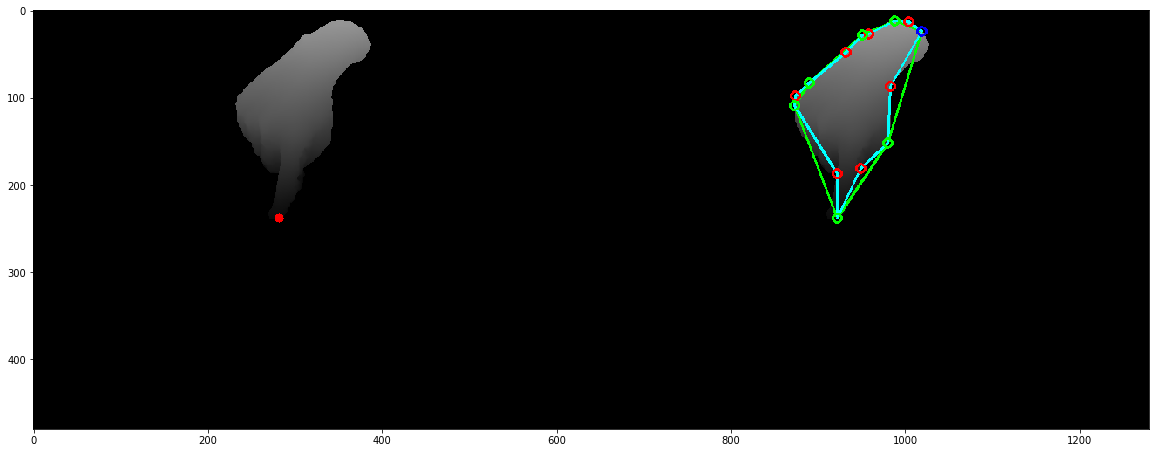

  25 :  [[282, 233]] len:  1


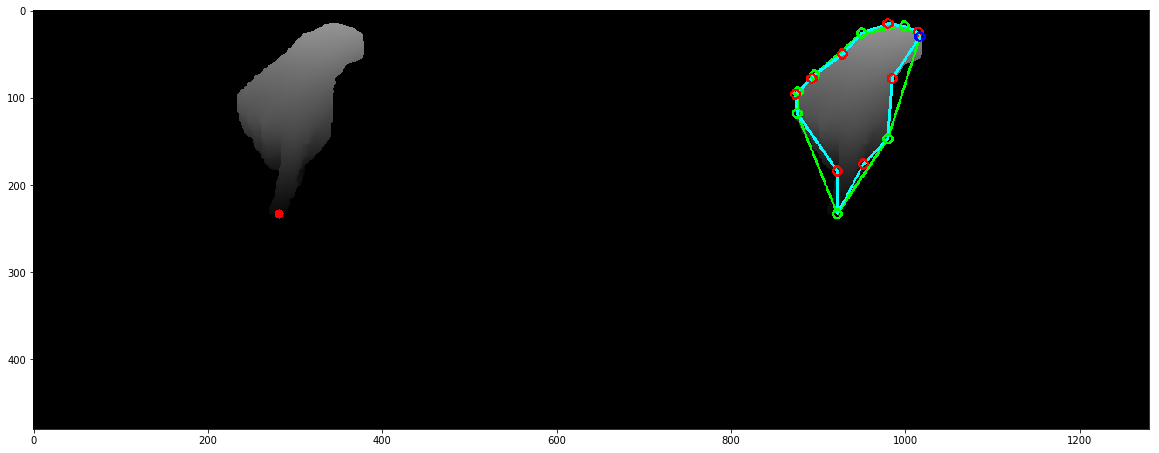

  26 :  [[283, 227]] len:  1


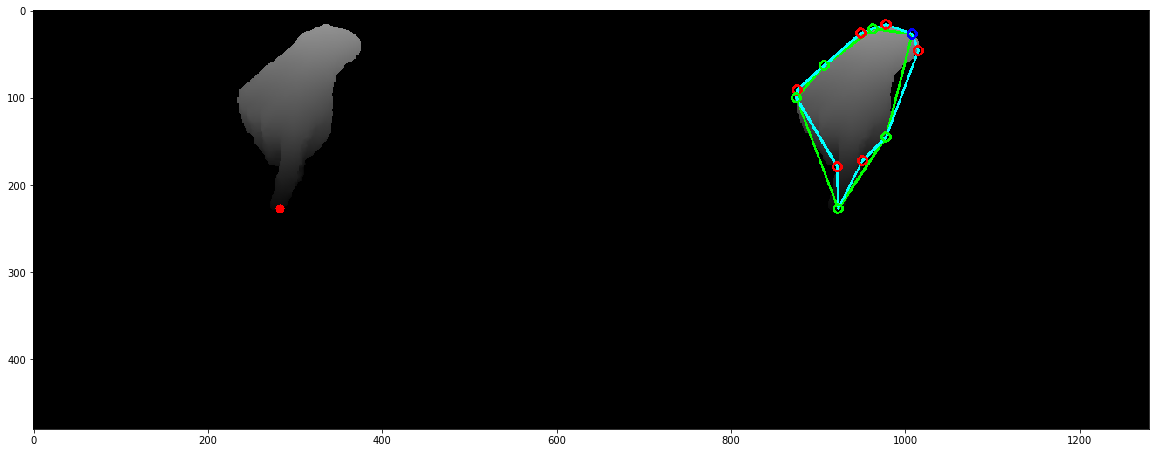

  27 :  [[284, 223]] len:  1


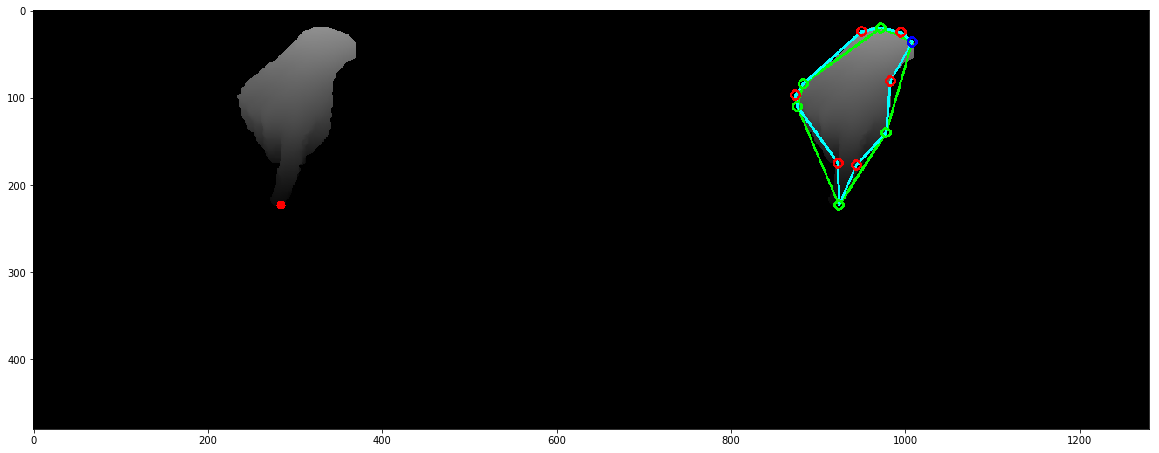

  28 :  [[283, 218]] len:  1


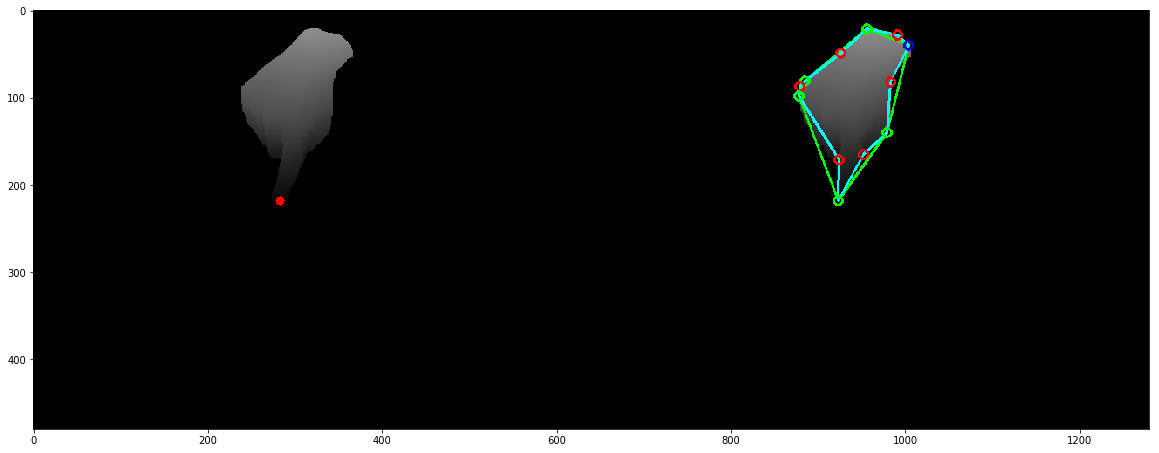

  29 :  [[285, 213]] len:  1


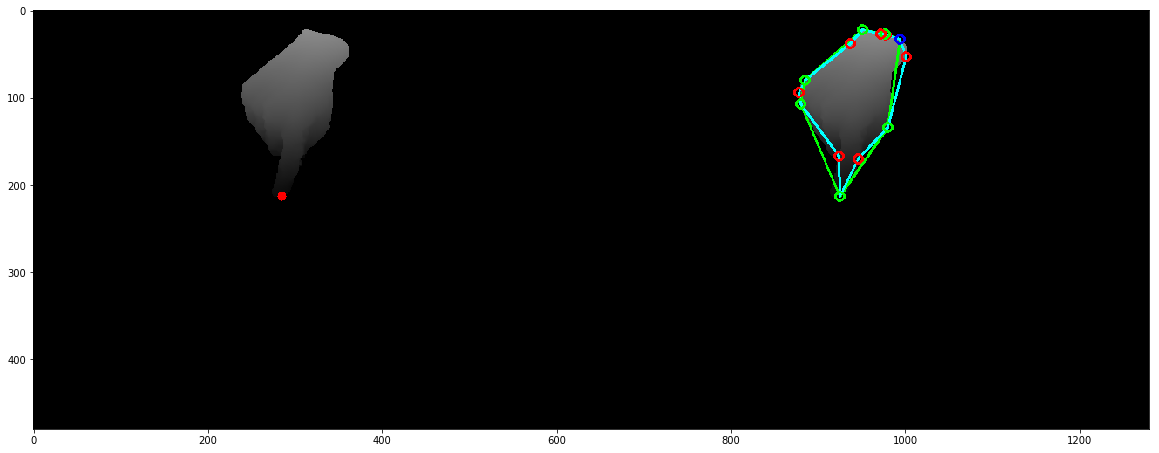

  30 :  [[283, 209]] len:  1


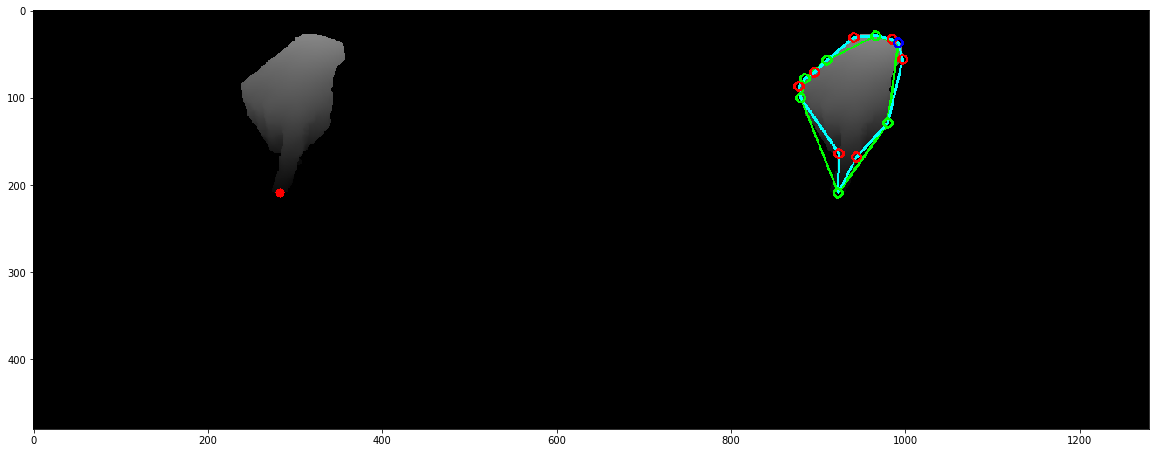

  31 :  [[284, 205]] len:  1


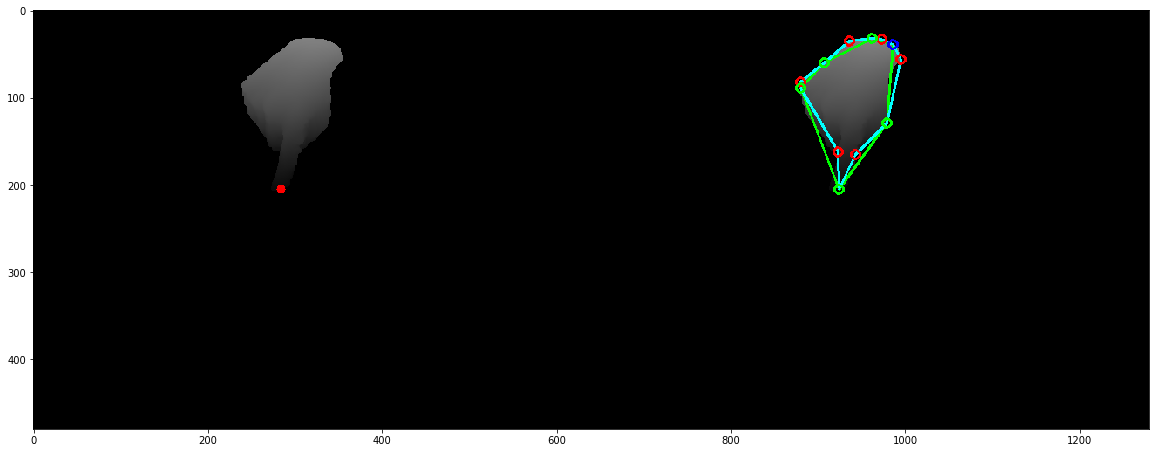

  32 :  [[283, 204]] len:  1


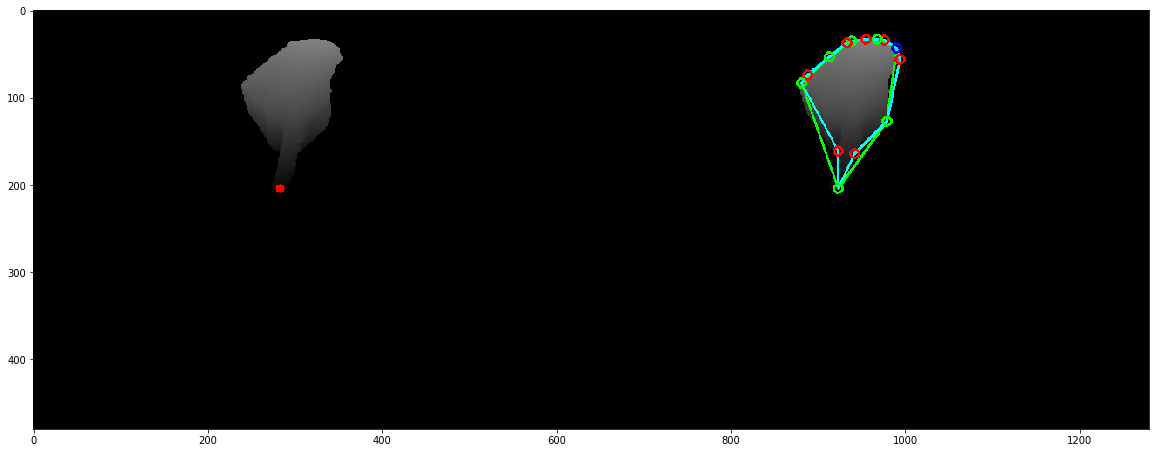

  33 :  [[282, 203]] len:  1


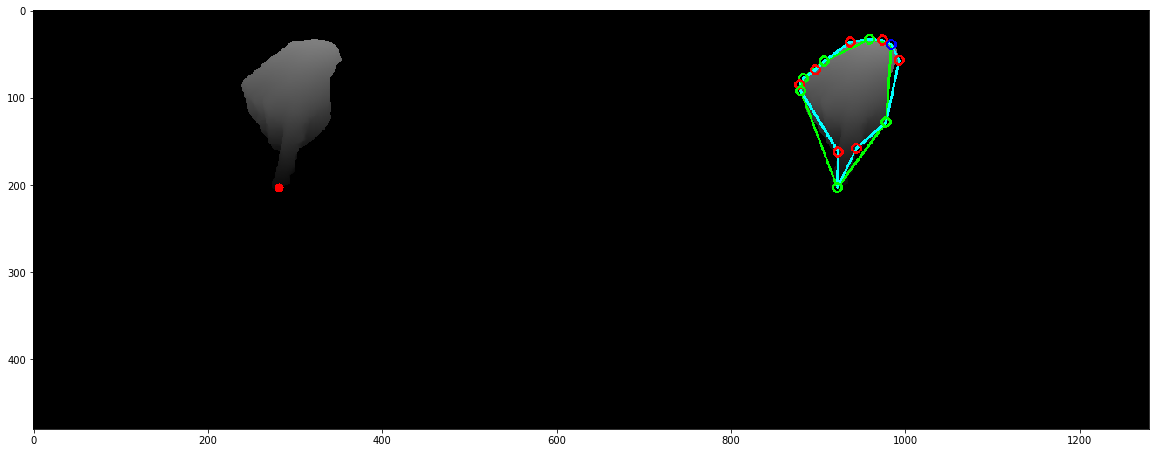

  34 :  [[283, 201]] len:  1


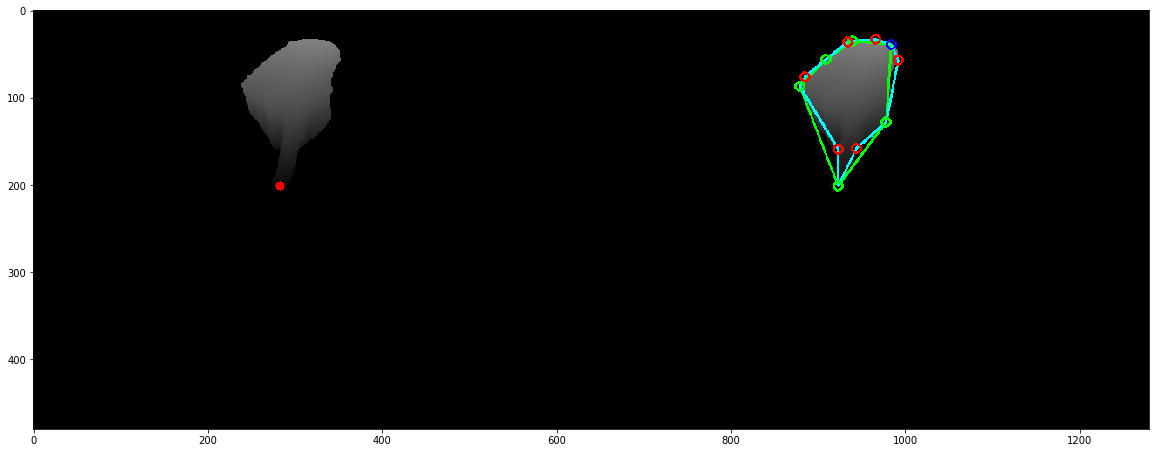

  35 :  [] len:  1


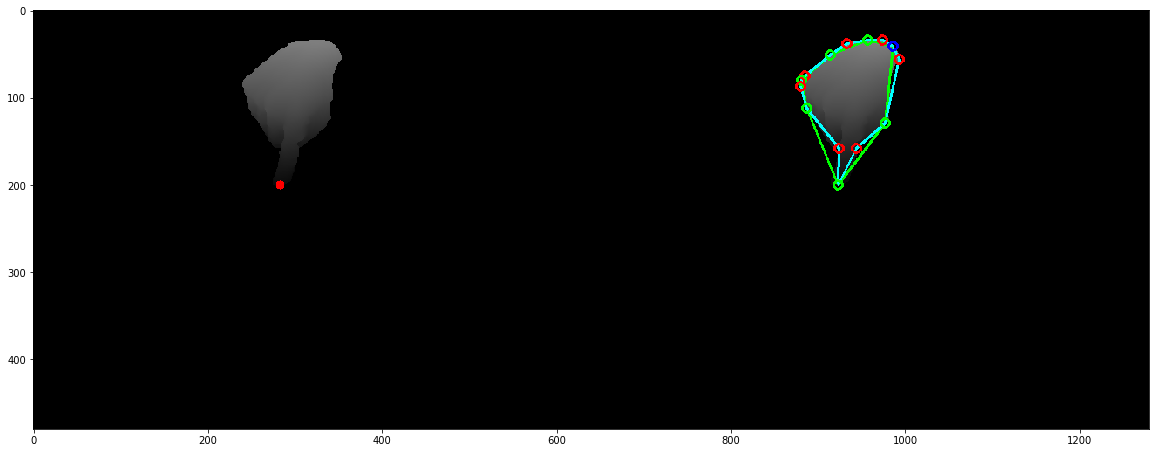

  36 :  [] len:  1


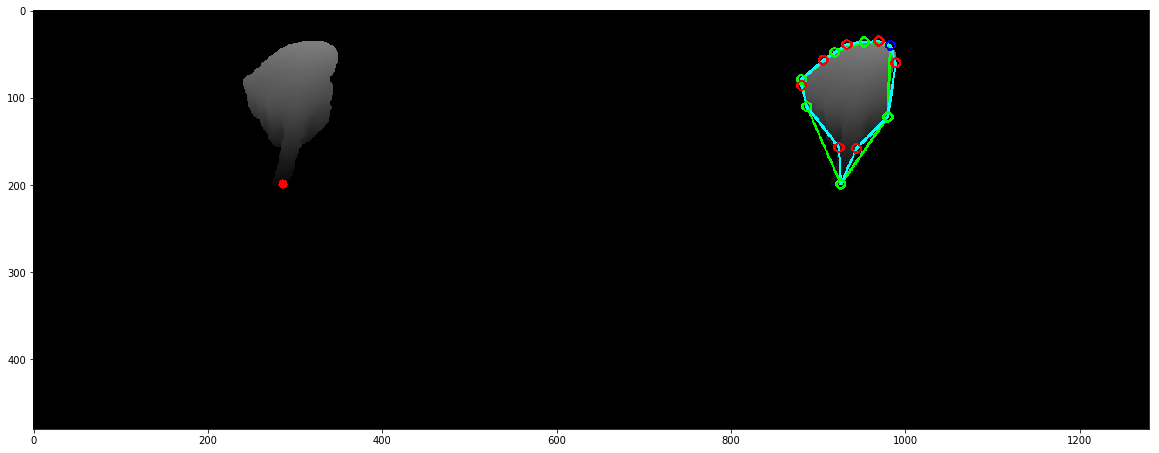

  37 :  [] len:  1


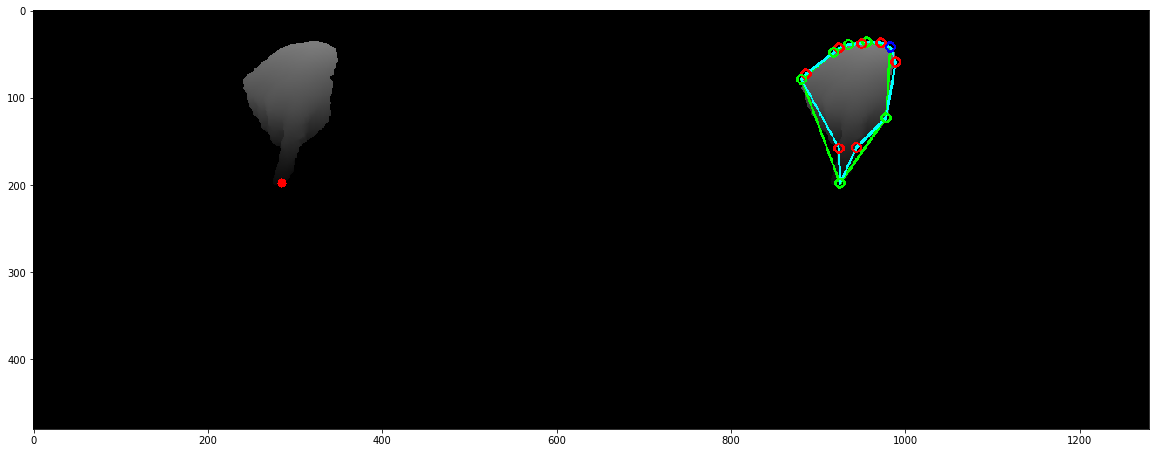

  38 :  [] len:  1


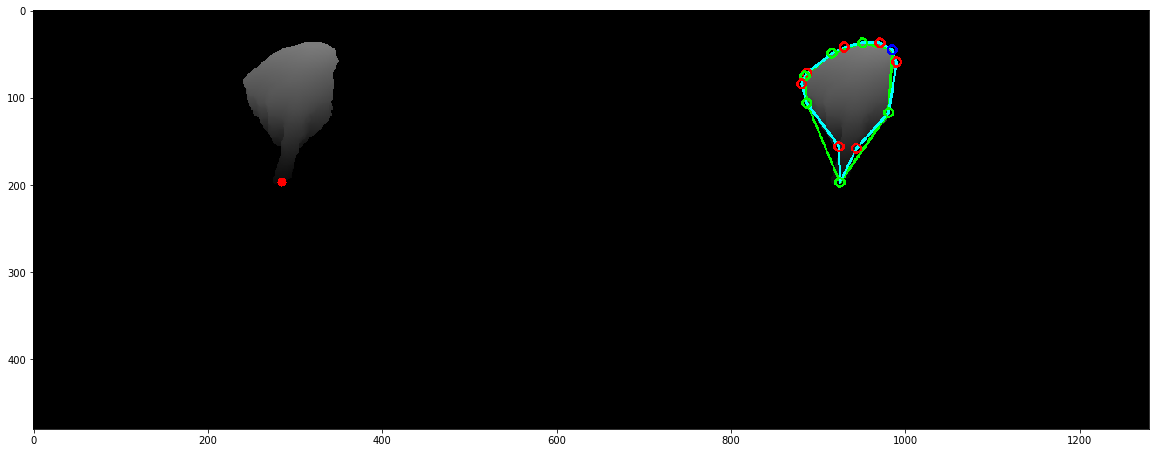

  39 :  [] len:  1


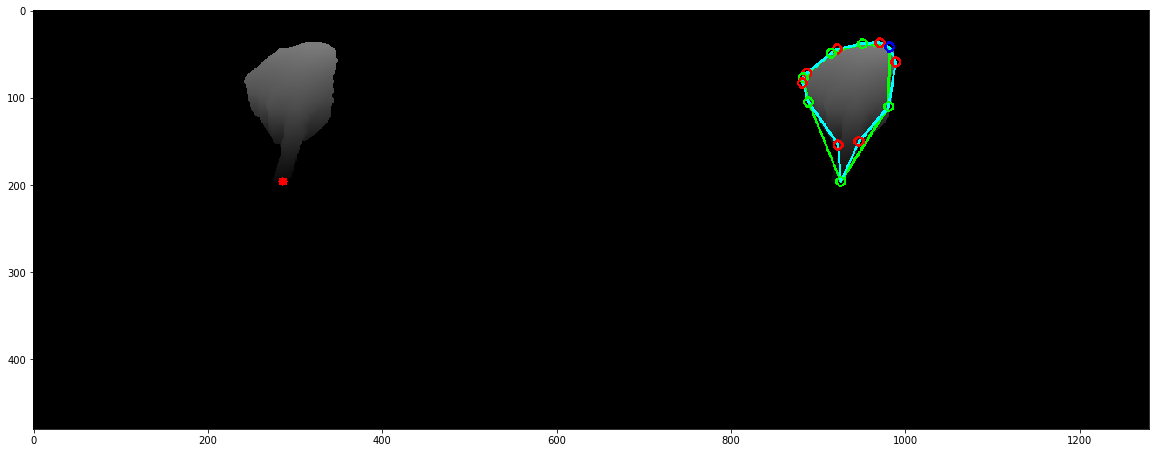

  40 :  [] len:  0


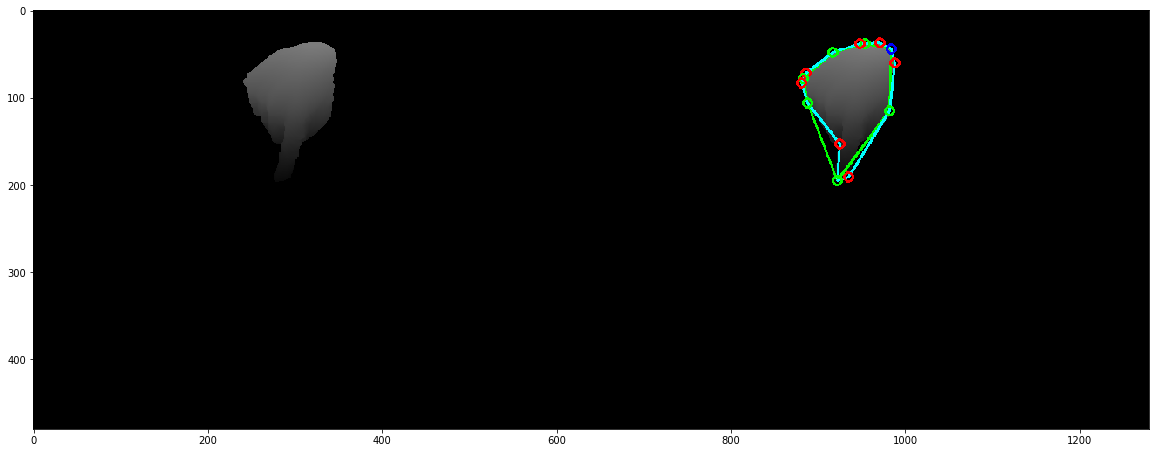

  41 :  [] len:  1


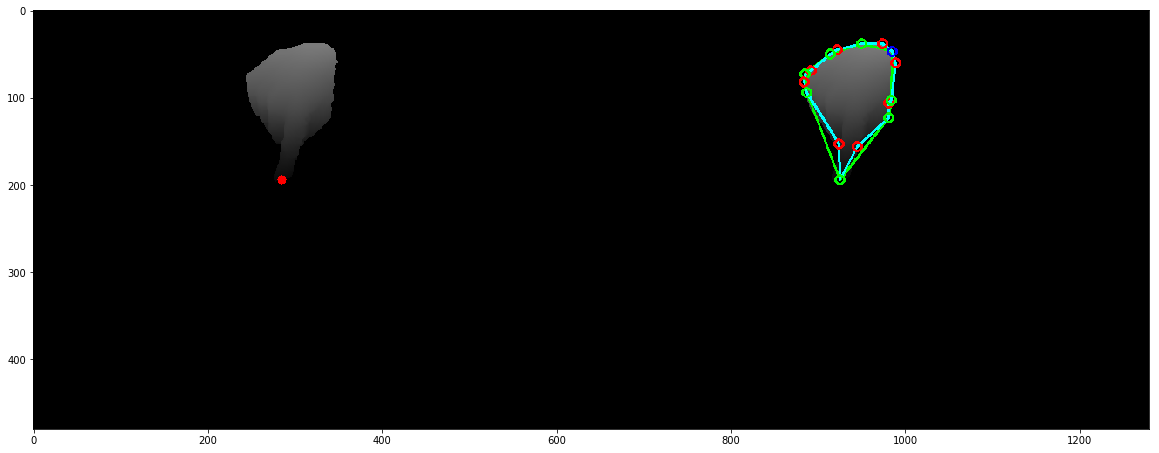

  42 :  [] len:  0


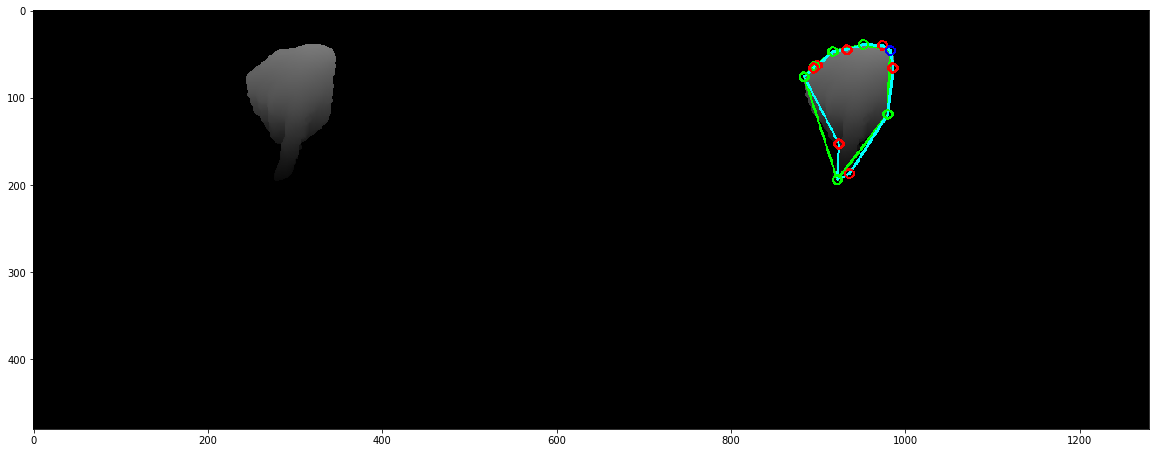

  43 :  [] len:  1


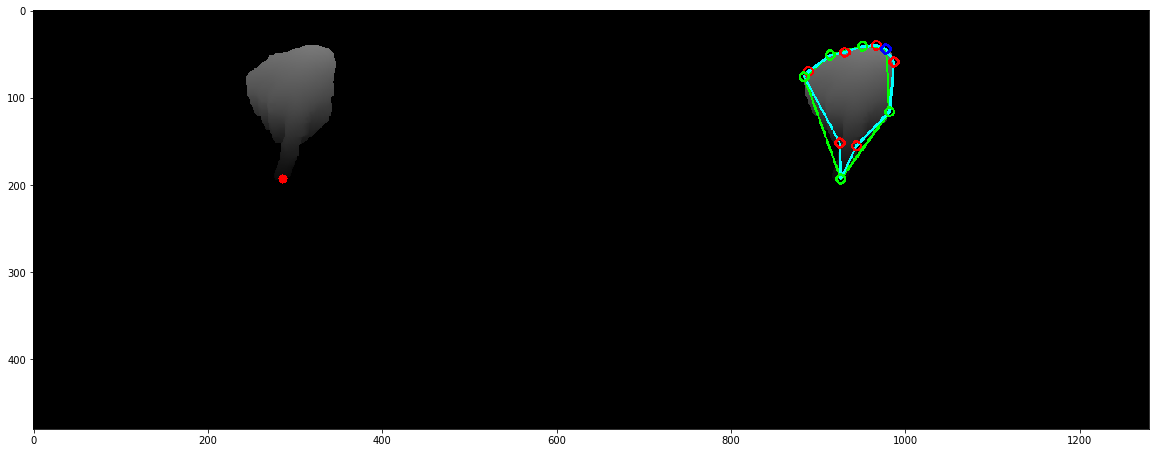

  44 :  [] len:  1


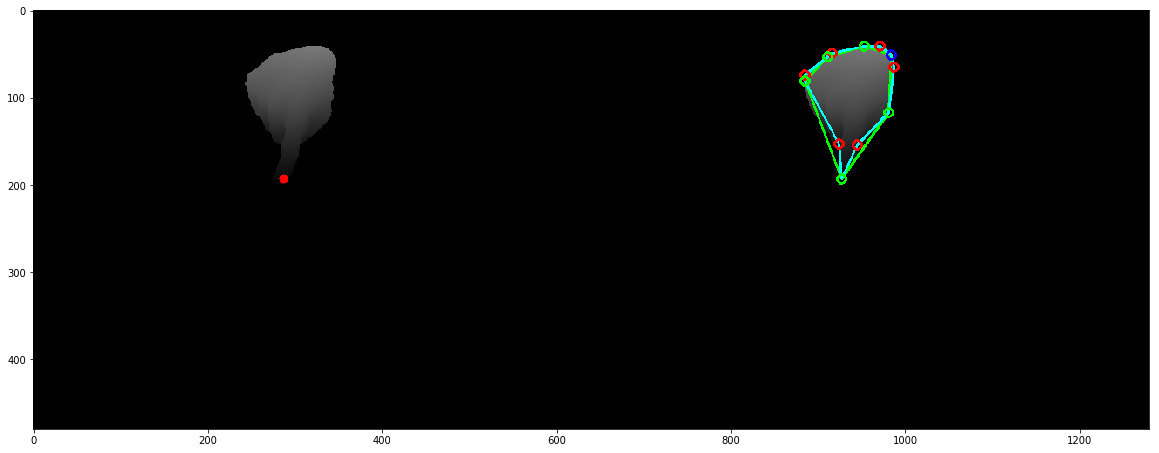

  45 :  [] len:  1


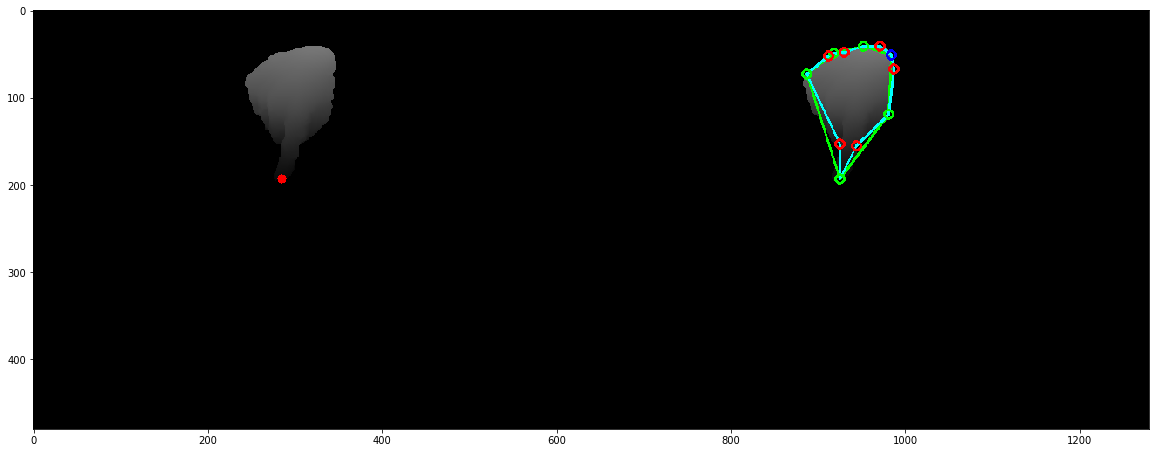

  46 :  [] len:  1


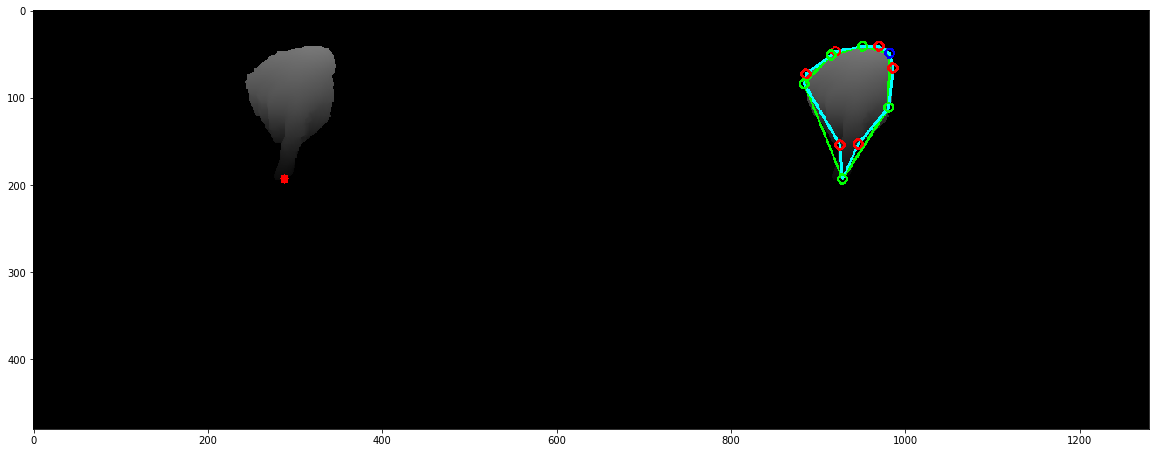

  47 :  [] len:  0


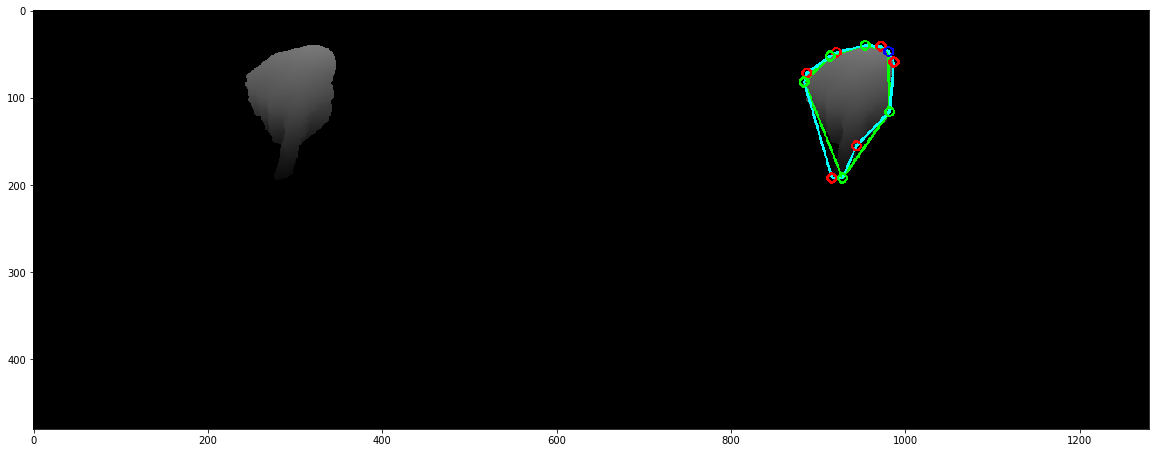

  48 :  [] len:  1


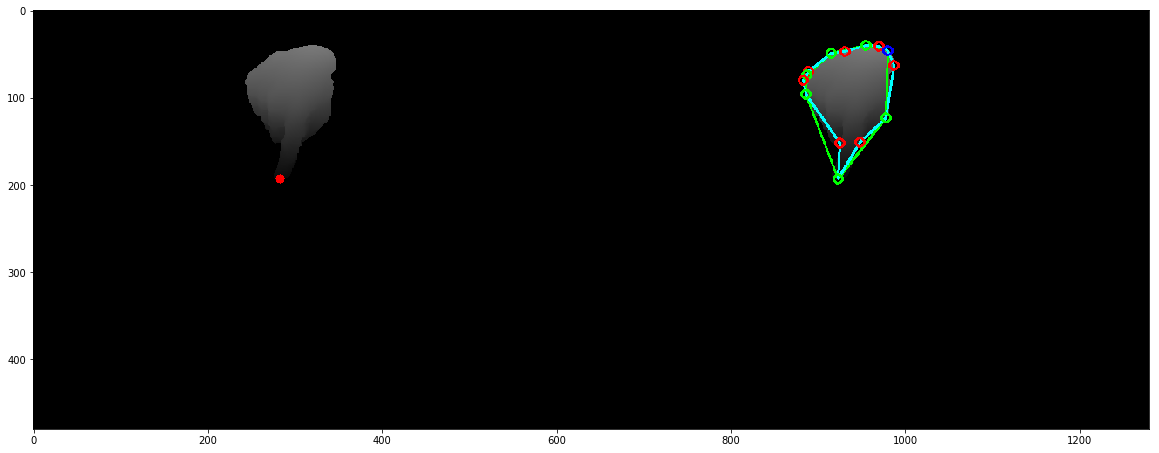

  49 :  [] len:  1


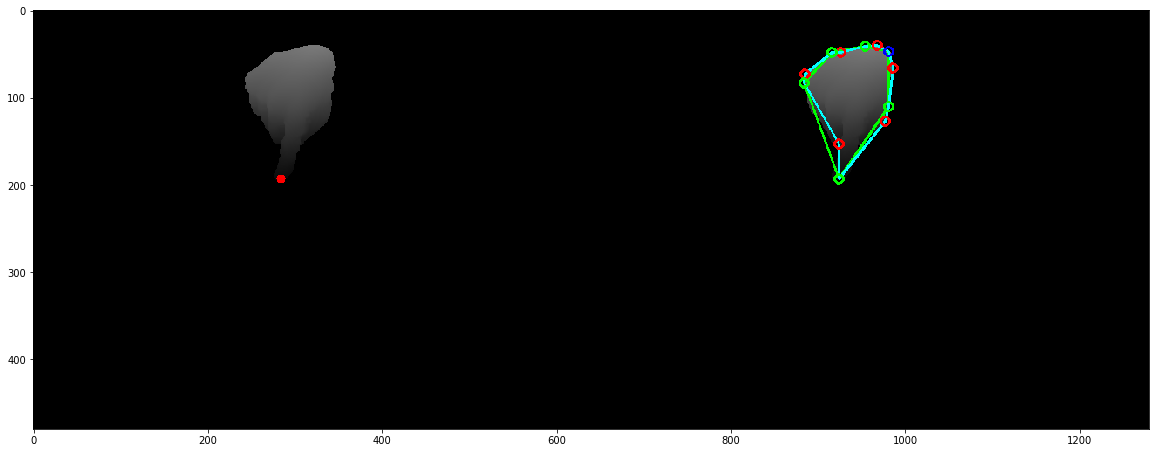

  50 :  [] len:  1


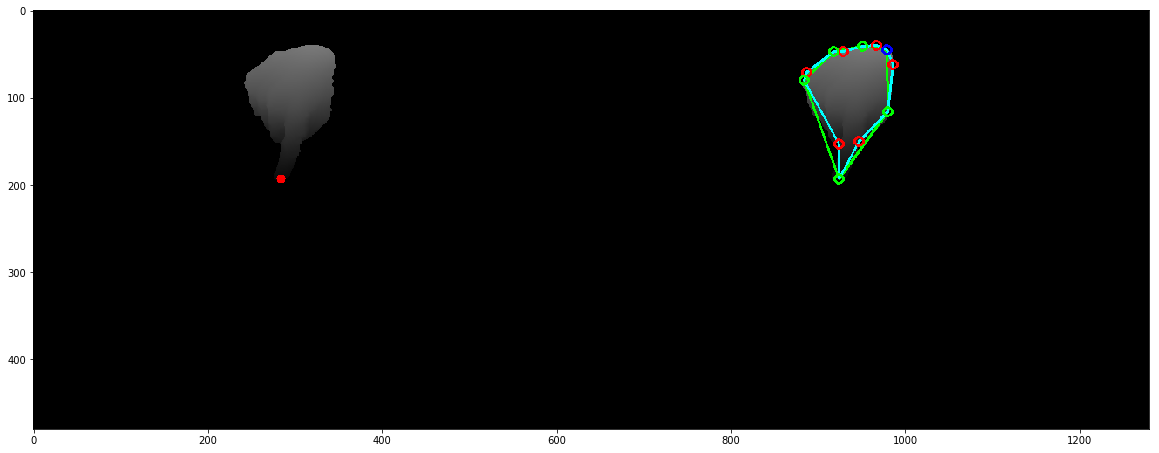

  51 :  [] len:  1


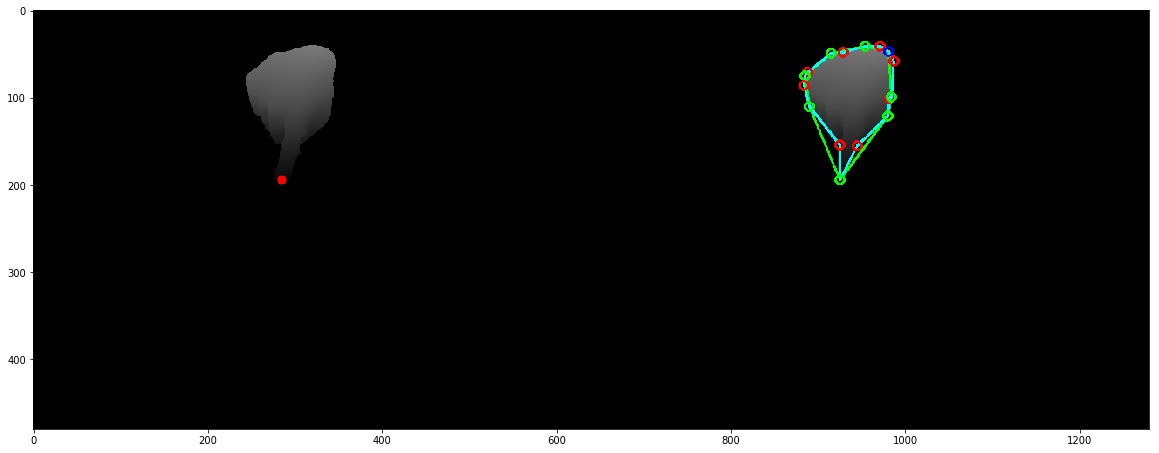

  52 :  [] len:  1


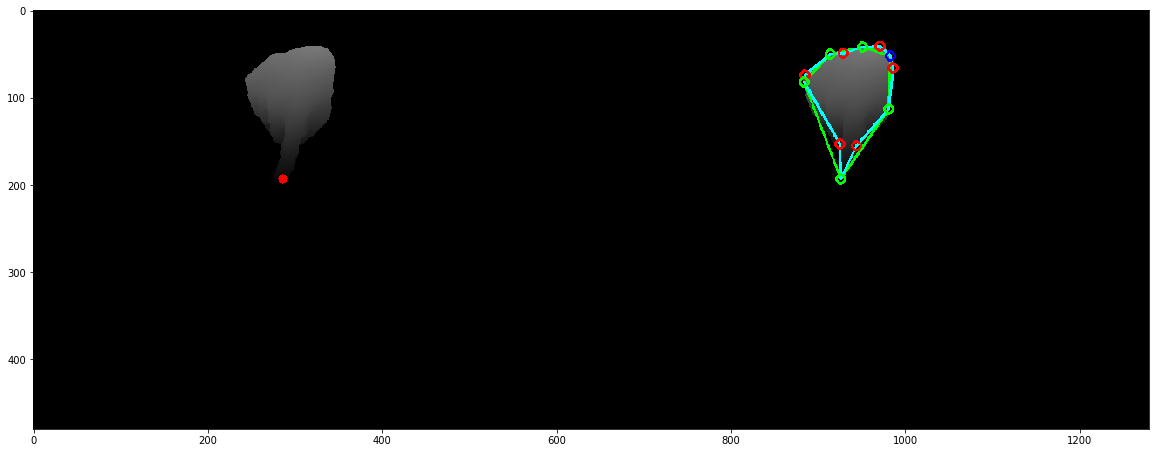

  53 :  [] len:  1


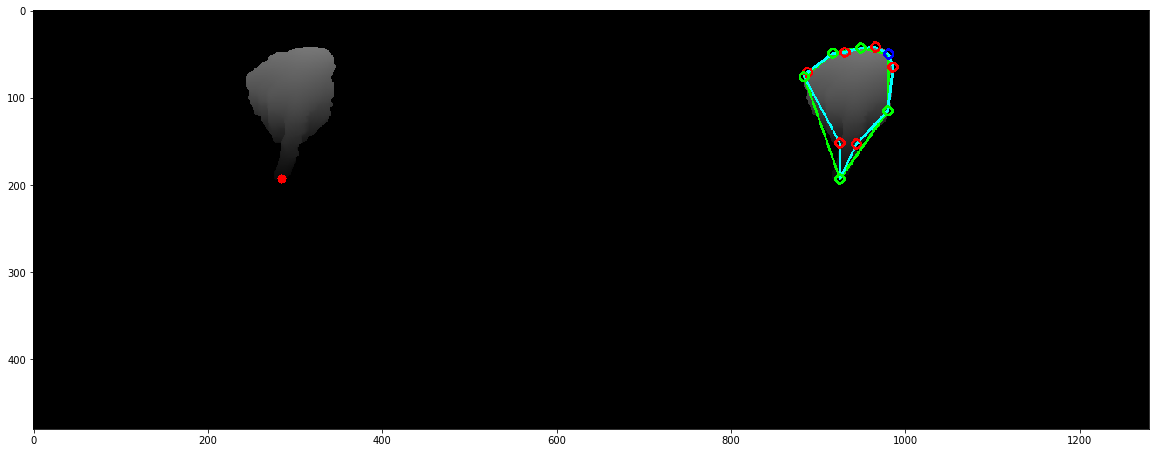

  54 :  [] len:  1


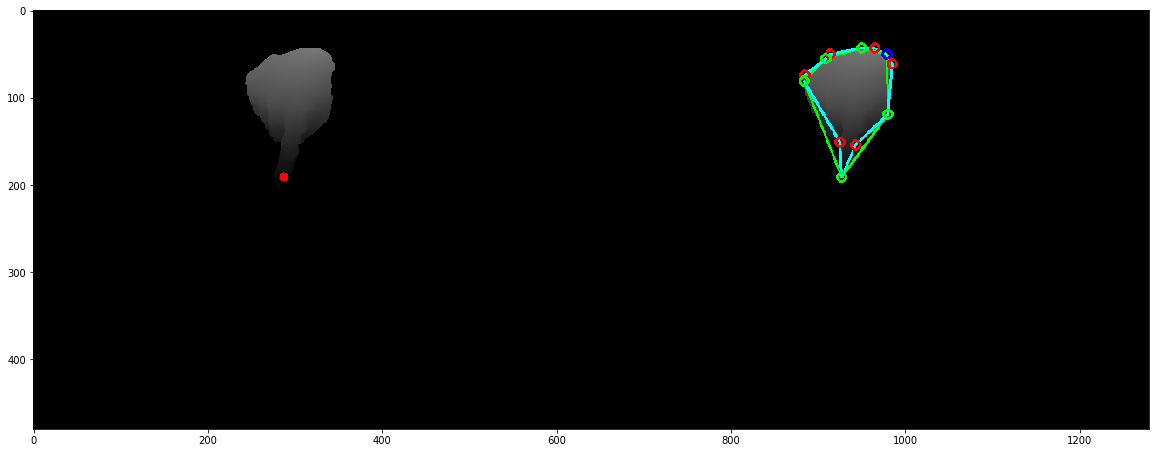

  55 :  [] len:  1


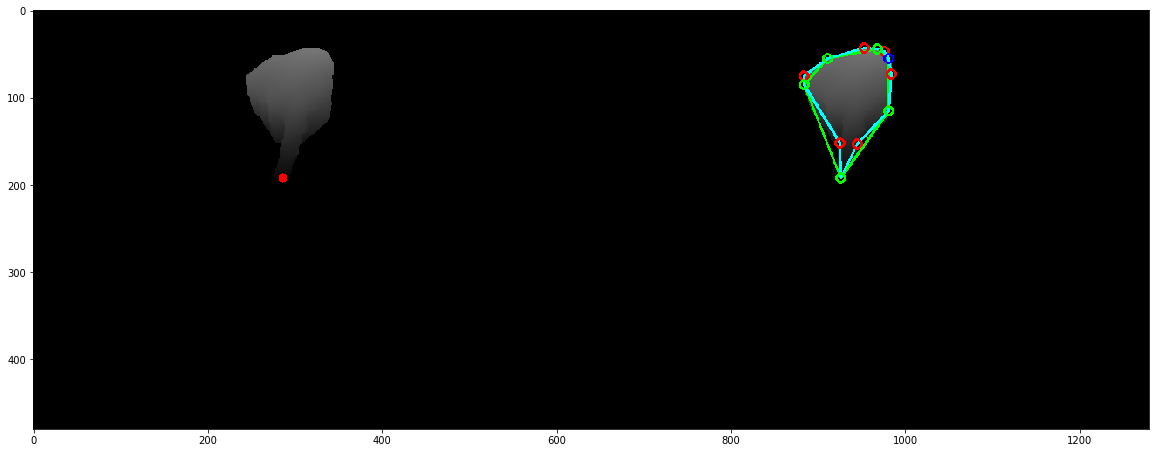

  56 :  [] len:  1


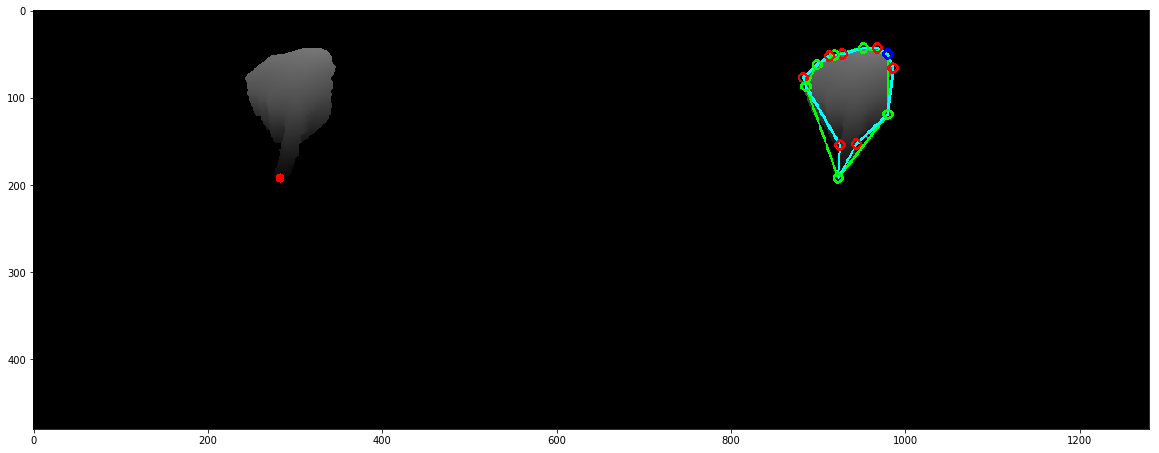

  57 :  [] len:  1


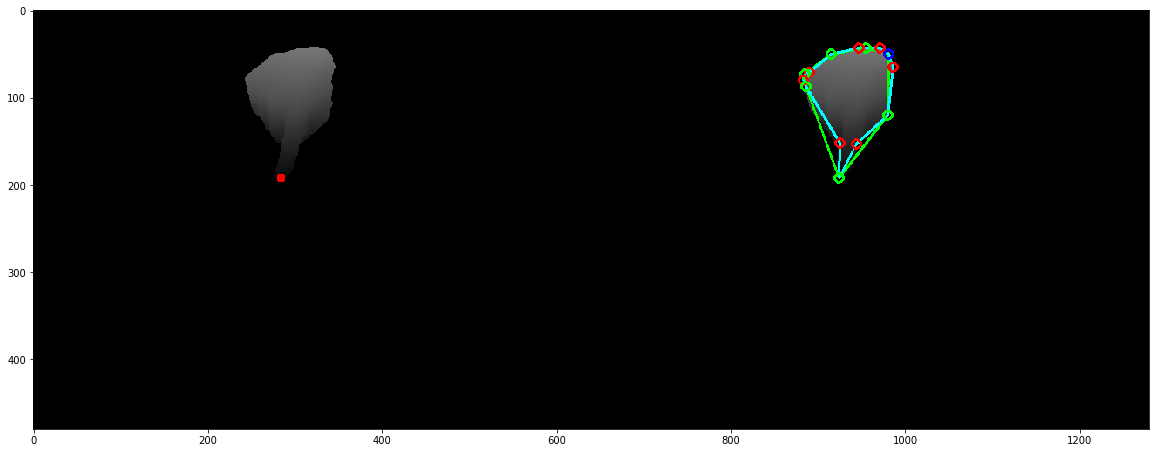

  58 :  [] len:  1


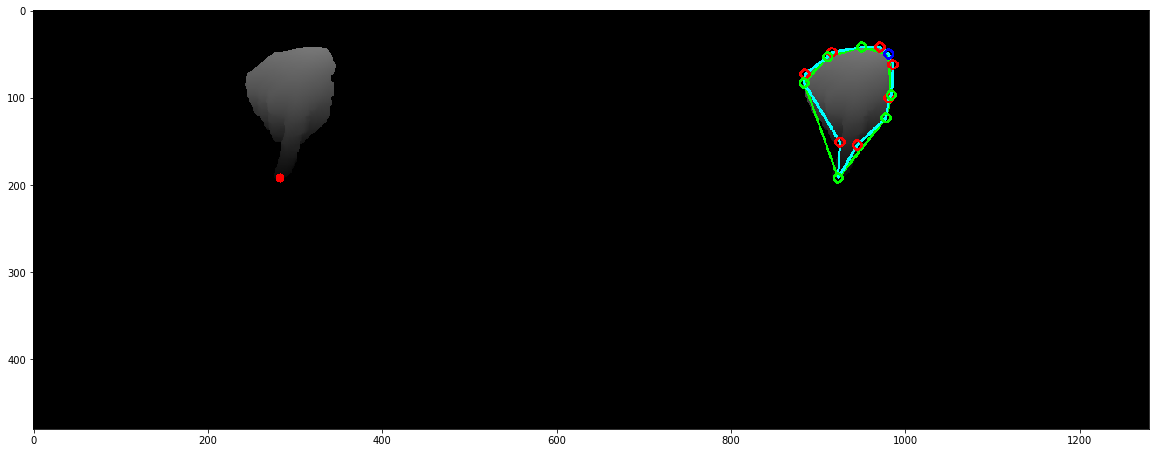

  59 :  [] len:  1


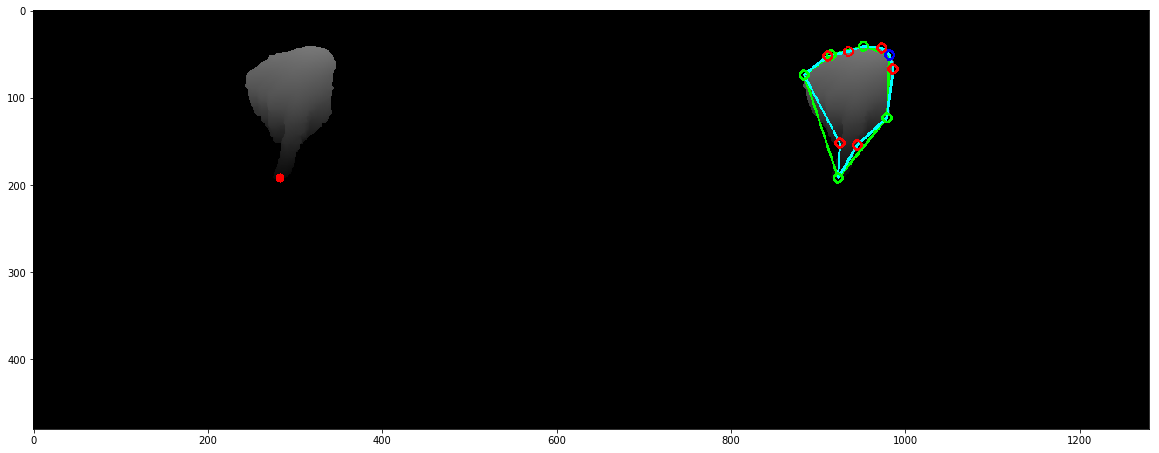

  60 :  [] len:  1


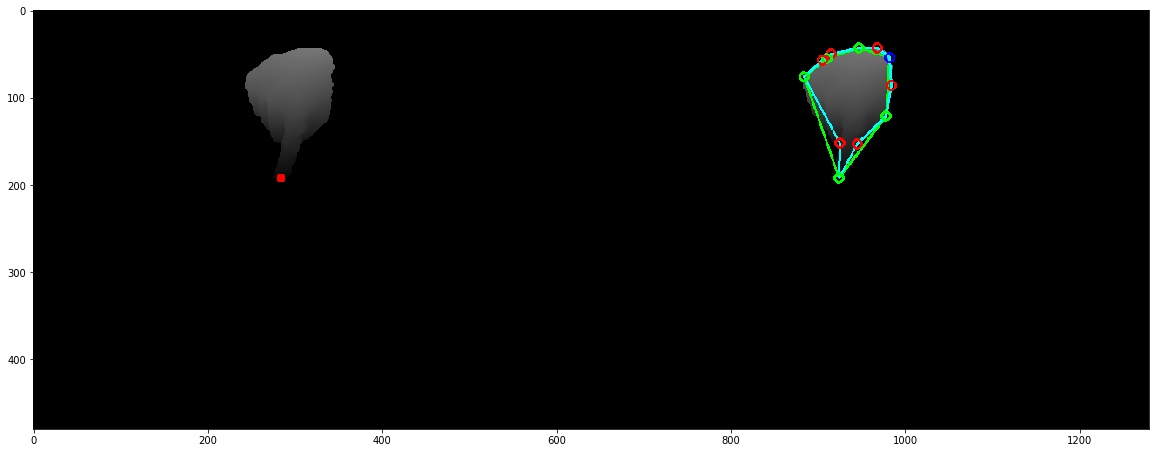

  61 :  [] len:  1


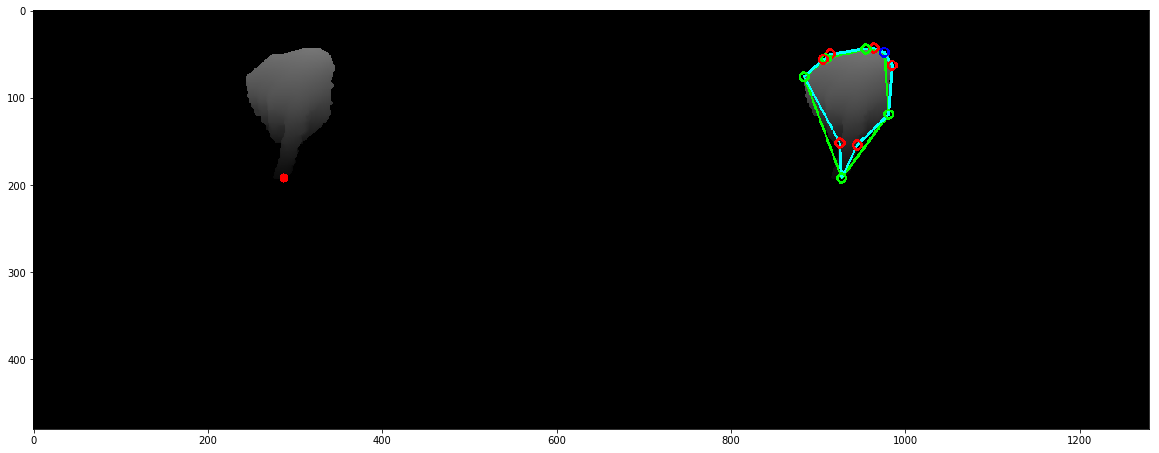

  62 :  [] len:  0


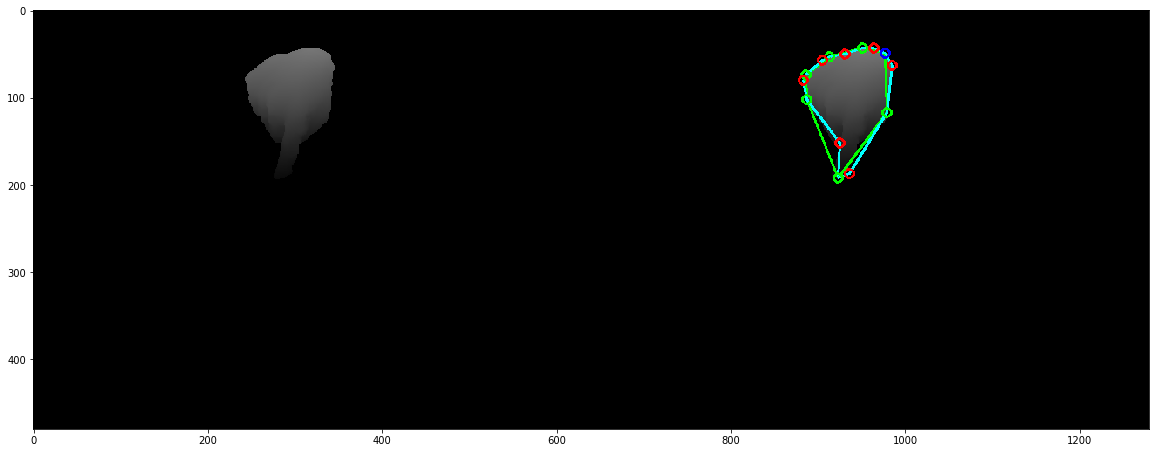

  63 :  [] len:  1


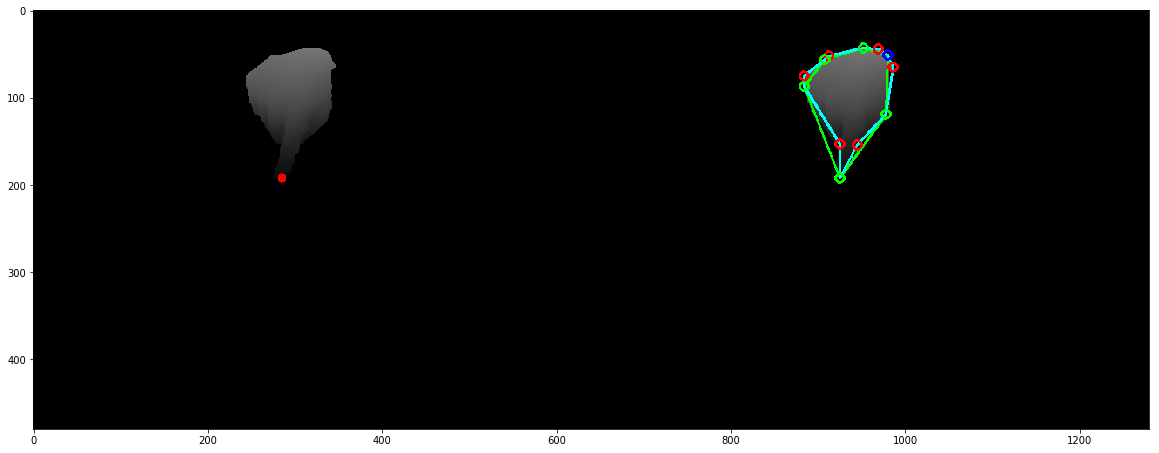

  64 :  [] len:  1


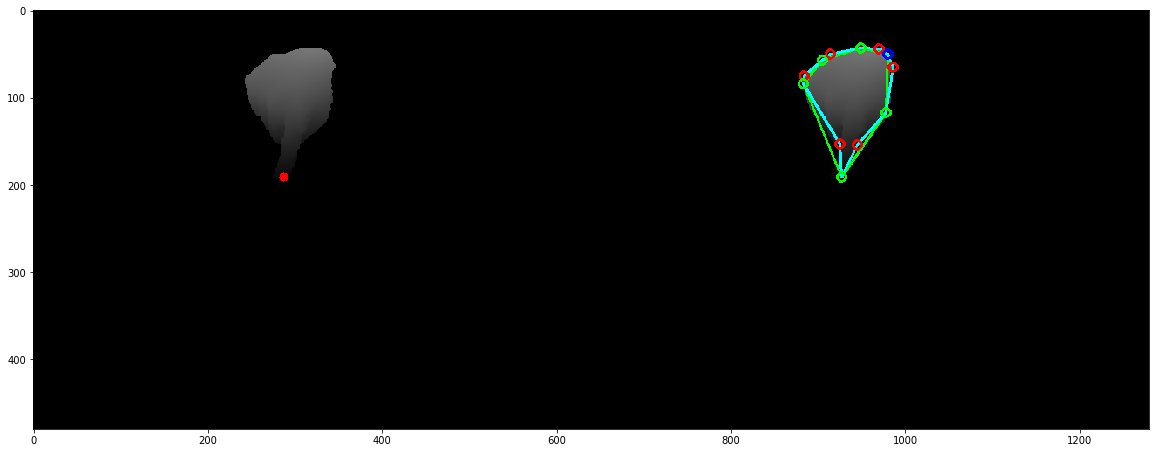

  65 :  [] len:  1


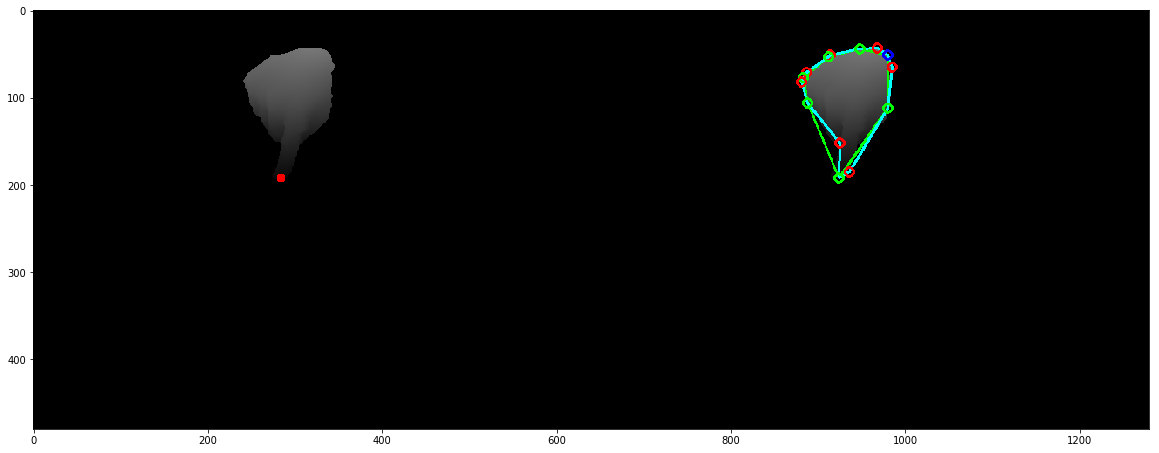

  66 :  [] len:  0


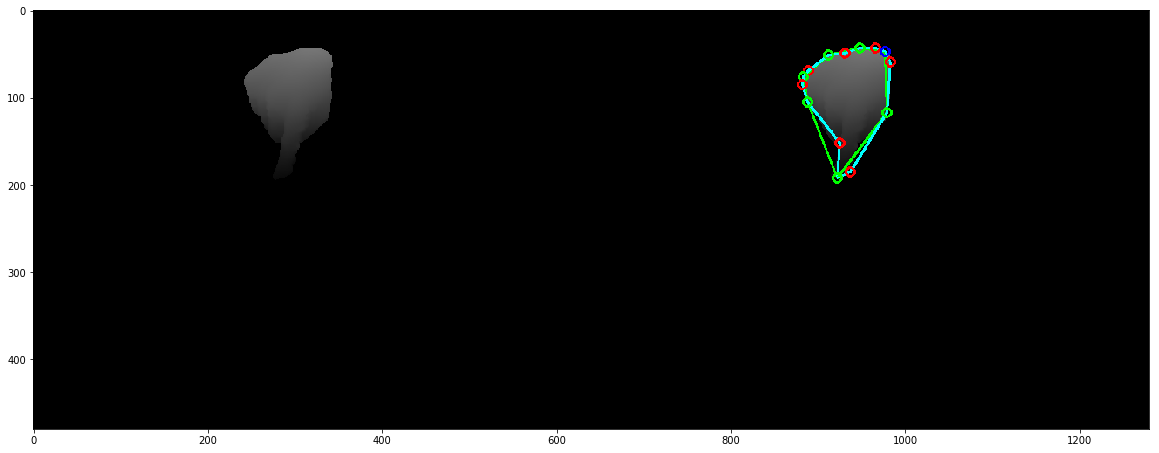

  67 :  [] len:  1


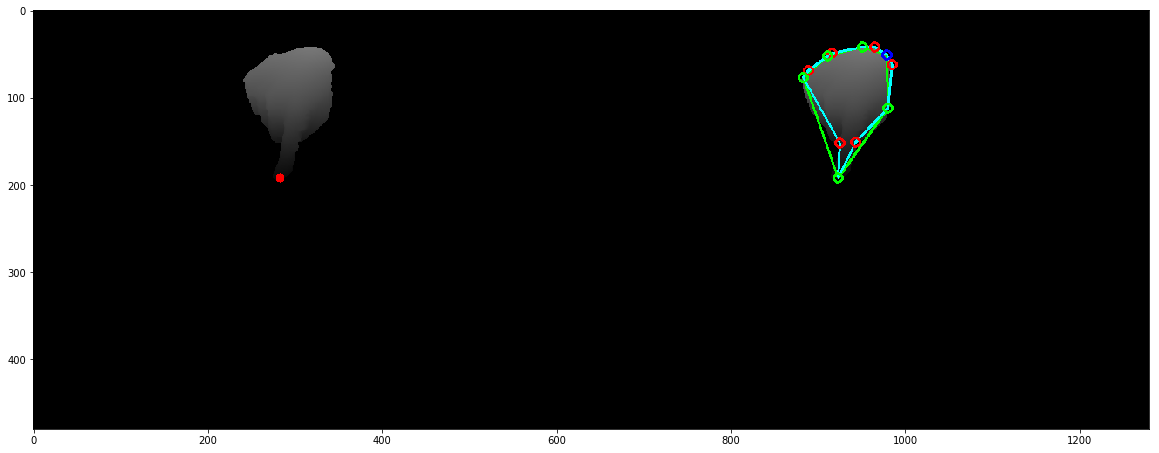

  68 :  [] len:  1


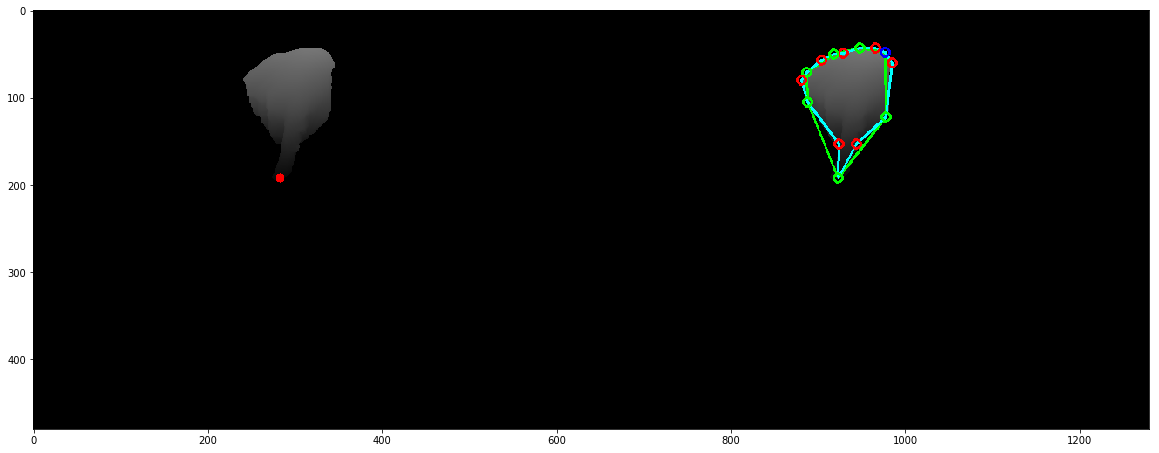

In [4]:
one = h5py.File('../recording_data/1_tap.hdf5', 'r')
org = one['pcl_center'][...]
mat = one['trans_matrix'][...]
analyser = HandShapeAnalysis.Depth2Finger(org, mat)
analyser.set_show(debug = False, finger_point_image = True, 
                  hull_image = True, detected_defect = True, cluster_point= True,  possibility_modal = False)
for i in range(0,len(one['depth']),1):
    analyser.renew_depth(one['depth'][i])
    x = (analyser.finger_point[:,1]-200)
    print("{:4d}".format(i),": ",analyser.finger_point[np.logical_and(x<150, x>0)].tolist(), "len: ",len(analyser.finger_point))
    plt_imsize(np.hstack((analyser.finger_point_image,analyser.detected_defect)),size=(20,20))
    

[[302 253]]


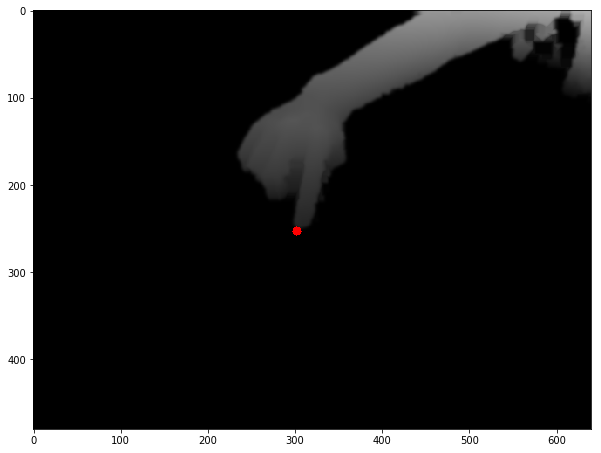

In [11]:
analyser.renew_depth(one['depth'][0])
print(analyser.finger_point)
plt_imsize(analyser.finger_point_image)

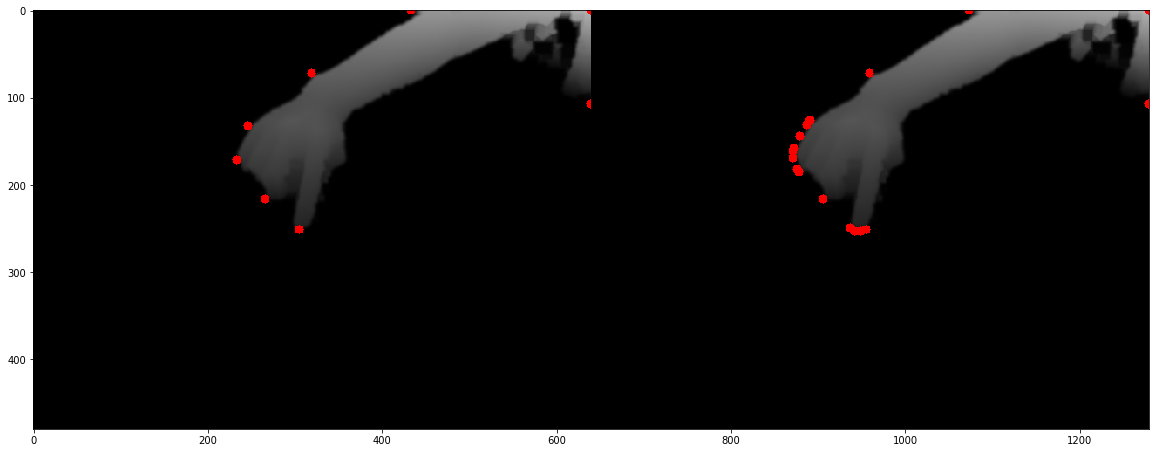

In [12]:
plt_imsize(np.hstack((analyser.cluster_point,analyser.hull_image)),size=(20,20))

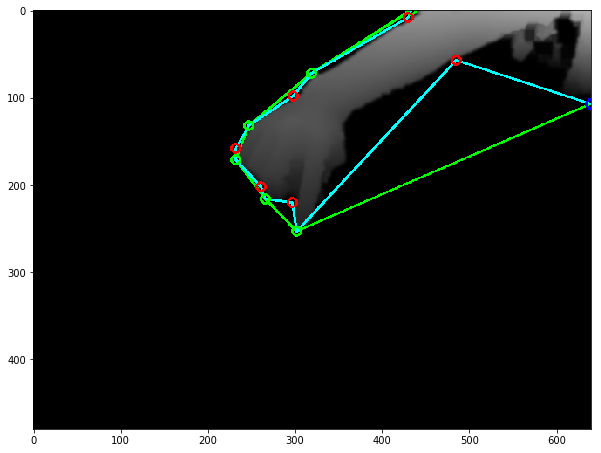

In [13]:
plt_imsize(analyser.detected_defect)

In [14]:
np.linalg.norm((np.array([454,224])-np.array([438,229])))

16.76305461424021

In [15]:
point = deproject.compute(one['depth'][11].astype(np.short()))

#homography process
point = np.dot(mat, (point - org).reshape((-1,3)).T).T.reshape((480, 640, 3))

zm_upper_min = point[:,:,2] > 0.02
zp_upper_max = point[:,:,2] < 0.20
cloud_upper = zm_upper_min & zp_upper_max & (one['depth'][11] != 0)
##binary image of point cloud
cloud_image = np.where(cloud_upper,255,0).astype(np.uint8)

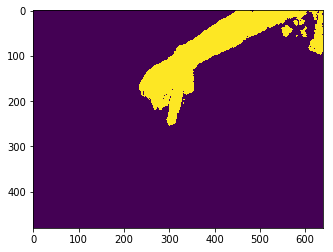

In [16]:
plt.imshow(cloud_image)

In [17]:
new = point[:,:,2]/np.max(point[:,:,2])*255
boo = ((new>10) & (one['depth'][11] != 0))
new = np.where(boo,point[:,:,2],0)
newp = np.where(boo.reshape(new.shape[0],new.shape[1],1),point,0)

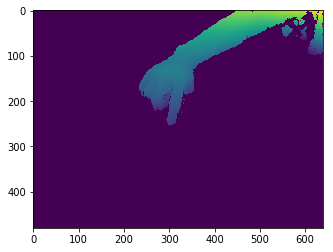

In [18]:
plt.imshow(new)

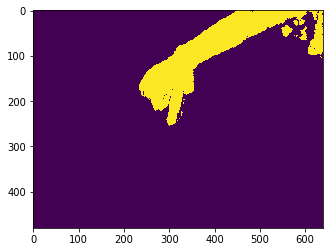

In [19]:
plt.imshow(np.where(new>0,255,0))

In [20]:
point = deproject.compute(one['depth'][11].astype(np.short()))
#homography process
point = np.dot(mat, (point - org).reshape((-1,3)).T).T.reshape((480, 640, 3))

In [21]:
import pptk
v = pptk.viewer(newp)

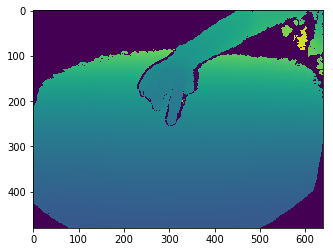

In [7]:
plt.imshow(one['depth'][11])

In [8]:
one['depth'][11]

array([[   0,    0,    0, ..., 3922, 3916,    0],
       [   0,    0,    0, ..., 3916, 3911,    0],
       [   0,    0,    0, ..., 3916, 3908,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

In [6]:
analyser.renew_high(one['depth'][11])

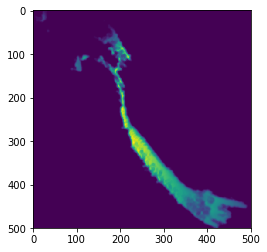

In [7]:
plt.imshow(analyser.process_image)